# Assignment 4 : Unsupervised Learning 

## Pre read note

#1.For imputing missing values, fancyimpute package could not be installed. Hence Missingpy package is used.

## 1.Import necessary libraries

In [1]:
# suppress warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# load basic libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import time

# load libraries related to model building and evaluation
 

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from missingpy import MissForest



In [2]:
# creating data frame to capture comparison output of all models
modelevalcompdf = pd.DataFrame(columns=['Model','Variant','Precision','Recall','F1','Accuracy',\
                                        'CM','CV Mean Accuracy','Acc range @95% CL'])

## 2. Load Data

In [3]:
# data is loaded to 2 dataframes. rawdata and mydata. 
#rawdata will represent the original data and mydata will be updated for transformations

myfile = "vehicle-1.csv"
rawdata = pd.read_csv(myfile) 
mydata = pd.read_csv(myfile)
rawdata.sample(10)


compactness  circularity  distance_circularity  radius_ratio  \
411           78         36.0                  51.0         116.0   
333           86         42.0                  65.0         125.0   
418           87         43.0                  70.0         169.0   
552           90         39.0                  89.0         181.0   
66            81         43.0                  68.0         125.0   
255          112         50.0                 110.0         186.0   
732           85         45.0                  73.0         167.0   
44           119         54.0                 106.0         220.0   
769           91         36.0                  83.0         162.0   
357          109         49.0                 109.0         193.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
411                  56.0                        4          120.0   
333                  54.0                        7          150.0   
418                  72.0                        7          152.0   
552                  62.0                        8          175.0   
66                   57.0                        8          149.0   
255                  56.0                       11          214.0   
732                  69.0                        8          143.0   
44                   65.0                       12          213.0   
769                  61.0                        8          142.0   
357                  59.0                       10          207.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
411           57.0                    17.0                        124   
333           45.0                    19.0                        140   
418           44.0                    19.0                        145   
552           38.0                    21.0                        132   
66            46.0                    19.0                        146   
255           31.0                    24.0                        159   
732           46.0                    18.0                        148   
44            31.0                    24.0                        167   
769           47.0                    19.0                        128   
357           32.0                    24.0                        156   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
411            135.0              209.0                      135.0   
333            171.0              327.0                      172.0   
418            177.0              341.0                      171.0   
552            200.0              458.0                      154.0   
66             169.0              323.0                      172.0   
255            232.0              676.0                      203.0   
732            173.0              307.0                      176.0   
44             223.0              675.0                      232.0   
769            163.0              298.0                      137.0   
357            225.0              635.0                      213.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
411                         84.0             1.0              12.0   
333                         85.0             2.0               8.0   
418                         76.0             6.0              12.0   
552                         70.0            11.0              15.0   
66                           NaN             NaN              18.0   
255                         71.0            18.0              27.0   
732                         71.0             2.0               0.0   
44                          66.0            20.0               1.0   
769                         63.0             0.0              31.0   
357                         70.0            13.0              31.0   

     skewness_about.2  hollows_ratio class  
411             177.0            184   car  
333             180.0            182   bus  
418 

## 3. EDA, Univariate/Bivariate/Multivariate Attribute Analysis

In [4]:
#understanding column datatypes , number of columns,rows 
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# updating the object data types as categorical 
mydata[mydata.select_dtypes(['object']).columns] = mydata.select_dtypes(['object']).apply(lambda x: x.astype('category'))


In [6]:
#understanding column datatypes , number of columns,rows 
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
# creating function for counting outliers ( based on IQR )
def outliercount(attr,df):
    Q1 = df[attr].quantile(0.25)
    Q3 = df[attr].quantile(0.75)
    IQR = Q3-Q1
    outlier_count=((df[attr]<(Q1-(1.5*IQR))) | (df[attr]>(Q3+(1.5*IQR)))).sum()
    return outlier_count

# EDA using custom built dataframe for analyzing attributes of type integer

Item=[]
for attr in mydata.select_dtypes(include=['integer','float64']).columns:
    Item.append([
        attr,mydata[attr].dtype,
        mydata[attr].isna().sum(),
        round((mydata[attr].isna().sum()/len(mydata[attr]))*100,2),
        mydata[attr].nunique(),
        list(mydata[attr].sample(5).drop_duplicates().values),
        mydata[attr].count(),
        len(mydata[mydata[attr]<0]),
        mydata[attr].std(),
        mydata[attr].min(),
        mydata[attr].quantile(.25),
        mydata[attr].quantile(.50),
        mydata[attr].mean(),
        mydata[attr].quantile(0.75),
        mydata[attr].max(),
        mydata[attr].skew(),
        outliercount(attr,mydata),
        round((outliercount(attr,mydata)/mydata[attr].count())*100,2)
    ]);
    
eda=pd.DataFrame(data=Item,columns=['Attribute','Datatype','Null','Null%',\
                                    'Unique','Sample','Count','-Ve Data',\
                                    'Stddev','Min','25%','50%','Mean','75%',\
                                    'Max','Skew','No.# Outlier','% Outlier'])

eda.round(2)

Attribute Datatype  Null  Null%  Unique  \
0                   compactness    int64     0   0.00      44   
1                   circularity  float64     5   0.59      27   
2          distance_circularity  float64     4   0.47      63   
3                  radius_ratio  float64     6   0.71     134   
4          pr.axis_aspect_ratio  float64     2   0.24      37   
5       max.length_aspect_ratio    int64     0   0.00      21   
6                 scatter_ratio  float64     1   0.12     131   
7                 elongatedness  float64     1   0.12      35   
8        pr.axis_rectangularity  float64     3   0.35      13   
9     max.length_rectangularity    int64     0   0.00      66   
10              scaled_variance  float64     3   0.35     128   
11            scaled_variance.1  float64     2   0.24     422   
12    scaled_radius_of_gyration  float64     2   0.24     143   
13  scaled_radius_of_gyration.1  float64     4   0.47      39   
14               skewness_about  float64     6   0.71      23   
15             skewness_about.1  float64     1   0.12      41   
16             skewness_about.2  float64     1   0.12      30   
17                hollows_ratio    int64     0   0.00      31   

                                 Sample  Count  -Ve Data  Stddev    Min  \
0                 [99, 97, 94, 88, 102]    846         0    8.23   73.0   
1              [47.0, 56.0, 49.0, 52.0]    841         0    6.15   33.0   
2             [76.0, 81.0, 71.0, 100.0]    842         0   15.78   40.0   
3   [187.0, 133.0, 125.0, 136.0, 252.0]    840         0   33.52  104.0   
4        [68.0, 62.0, 66.0, 56.0, 59.0]    844         0    7.89   47.0   
5                           [11, 7, 10]    846         0    4.60    2.0   
6   [200.0, 149.0, 133.0, 211.0, 150.0]    845         0   33.21  112.0   
7              [40.0, 32.0, 41.0, 36.0]    845         0    7.82   26.0   
8              [18.0, 26.0, 19.0, 24.0]    843         0    2.59   17.0   
9             [132, 150, 133, 124, 134]    846         0   14.52  118.0   
10  [184.0, 214.0, 176.0, 143.0, 164.0]    843         0   31.41  130.0   
11  [330.0, 480.0, 766.0, 557.0, 247.0]    844         0  176.67  184.0   
12  [147.0, 176.0, 132.0, 204.0, 222.0]    844         0   32.58  109.0   
13       [83.0, 78.0, 66.0, 72.0, 62.0]    842         0    7.49   59.0   
14        [1.0, 13.0, 18.0, 11.0, 12.0]    840         0    4.92    0.0   
15                [7.0, 20.0, 6.0, 9.0]    845         0    8.94    0.0   
16  [190.0, 186.0, 181.0, 178.0, 188.0]    845         0    6.16  176.0   
17            [201, 200, 197, 189, 207]    846         0    7.44  181.0   

       25%    50%    Mean    75%     Max  Skew  No.# Outlier  % Outlier  
0    87.00   93.0   93.68  100.0   119.0  0.38             0       0.00  
1    40.00   44.0   44.83   49.0    59.0  0.26             0       0.00  
2    70.00   80.0   82.11   98.0   112.0  0.11             0       0.00  
3   141.00  167.0  168.89  195.0   333.0  0.39             3       0.36  
4    57.00   61.0   61.68   65.0   138.0  3.83             8       0.95  
5     7.00    8.0    8.57   10.0    55.0  6.78            13       1.54  
6   147.00  157.0  168.90  198.0   265.0  0.61             0       0.00  
7    33.00   43.0   40.93   46.0    61.0  0.05             0       0.00  
8    19.00   20.0   20.58   23.0    29.0  0.77             0       0.00  
9   137.00  146.0  148.00  159.0   188.0  0.26             0       0.00  
10  167.00  179.0  188.63  217.0   320.0  0.65             1       0.12  
11  318.00  363.5  439.49  587.0  1018.0  0.84             2       0.24  
12  149.00  173.5  174.71  198.0   268.0  0.28             0       0.00  
13   67.00   71.5   72.45   75.0   135.0  2.08            15       1.78  
14    2.00    6.0    6.36    9.0    22.0  0.78            12       1.43  
15    5.00   11.0   12.60   19.0    41.0  0.69             1       0.12  
16  184.00  188.0  188.92  193.0   206.0  0.25             0       0.00  
17  190.25  197.0  195.63  2

#### Based on the above we can infer the following:

#1.There is missing data in most of the attributes (14/18). However interms of number of records the missing data is less than 1%.Missing data will need to be imputed.
#2.Most of the attributes have skeweness.
#3.There are outliers in most of the attribues(8/18).However interms of number of records the missing data is less than 2%. These outliers need to be reviewed to decide how to handle the same.
#4.There are no negative values in any of the attributes.

In [8]:
# EDA for attributes of type category

mydata.select_dtypes(include=['category']).describe(include='all')

class
count    846
unique     3
top      car
freq     429

#### Based on the above we can infer the following:

#1.This is the target column and there are no missing values. There are 3 classes.
#2.Values need to be converted to numeric for model builing.

### Missing values handling:

In [9]:
# review few records with missing values

(rawdata[rawdata.isnull().any(axis=1)]).head(10)

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5             26.0                    28.0                        169   
9             36.0                    22.0                        146   
19            32.0                    24.0                        169   
35            43.0                    20.0                        150   
66            46.0                    19.0                        146   
70            31.0                     NaN                        175   
77            45.0                    19.0                        133   
78            31.0                    24.0                        161   
105           30.0                    25.0                        168   
118           46.0                    19.0                        144   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5              280.0              957.0                      264.0   
9              202.0              505.0                      152.0   
19             227.0              651.0                      223.0   
35             170.0              363.0                      184.0   
66             169.0              323.0                      172.0   
70             226.0              683.0                      221.0   
77             165.0              330.0                      173.0   
78             227.0              666.0                      218.0   
105              NaN              711.0                      214.0   
118            168.0              324.0                      173.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
9                           64.0             4.0              14.0   
19                          74.0             6.0               5.0   
35                          67.0            17.0               7.0   
66                           NaN             NaN              18.0   
70                          76.0             3.0               6.0   
77                           NaN             2.0               3.0   
78                          76.0            11.0               4.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   

     skewness_about.2  hollows_ratio class  
5               181.0            183   bus  
9               195.0            204   car  
19  

In [10]:
# count of records with missing values

rawdata.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
# Using Missingpy package to calculate missing values 

tind=len(rawdata.columns)-1
array=rawdata.values
X=array[:,0:tind]
imputer=MissForest(n_jobs=4,random_state=9)
X_nonnull=imputer.fit_transform(X)
mydata2=pd.DataFrame(X_nonnull,columns=list(rawdata.columns)[:-1])
mydata2['class']=mydata['class'].copy(deep=True)
print()
print()

print(mydata2.isna().sum())

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


#1.It is assumed that data is missing at random and MissingPy package ( random forest method) has been leveraged to impute missing values.
#2.Post the calculation, there are no missing values for the attributes.
#3.In the following steps we will also check if the missing values imputed had any significant impact in changing the distribution values of the underlying attributes.
#4.We will do this by running EDA on complete data set and the original data set and analyzing the difference in distribution values between the 2 data sets.

In [12]:
#calculating EDA for this to check if there\
#is any significant change in key statistical values impacting the distribution

Item=[]
for attr in mydata2.select_dtypes(include=['integer','float64']).columns:
    Item.append([
        attr,mydata2[attr].dtype,
        mydata2[attr].isna().sum(),
        round((mydata2[attr].isna().sum()/len(mydata2[attr]))*100,2),
        mydata2[attr].nunique(),
        list(mydata2[attr].sample(5).drop_duplicates().values),
        mydata2[attr].count(),
        len(mydata2[mydata2[attr]<0]),
        mydata2[attr].std(),
        mydata2[attr].min(),
        mydata2[attr].quantile(.25),
        mydata2[attr].quantile(.50),
        mydata2[attr].mean(),
        mydata2[attr].quantile(0.75),
        mydata2[attr].max(),
        mydata2[attr].skew(),
        outliercount(attr,mydata2),
        round((outliercount(attr,mydata2)/mydata2[attr].count())*100,2)
    ]);
    
eda2=pd.DataFrame(data=Item,columns=['Attribute','Datatype','Null','Null%',\
                                    'Unique','Sample','Count','-Ve Data',\
                                    'Stddev','Min','25%','50%','Mean','75%',\
                                    'Max','Skew','No.# Outlier','% Outlier'])

eda2.round(2)

Attribute Datatype  Null  Null%  Unique  \
0                   compactness  float64     0    0.0      44   
1                   circularity  float64     0    0.0      32   
2          distance_circularity  float64     0    0.0      67   
3                  radius_ratio  float64     0    0.0     140   
4          pr.axis_aspect_ratio  float64     0    0.0      39   
5       max.length_aspect_ratio  float64     0    0.0      21   
6                 scatter_ratio  float64     0    0.0     132   
7                 elongatedness  float64     0    0.0      36   
8        pr.axis_rectangularity  float64     0    0.0      14   
9     max.length_rectangularity  float64     0    0.0      66   
10              scaled_variance  float64     0    0.0     131   
11            scaled_variance.1  float64     0    0.0     424   
12    scaled_radius_of_gyration  float64     0    0.0     145   
13  scaled_radius_of_gyration.1  float64     0    0.0      43   
14               skewness_about  float64     0    0.0      29   
15             skewness_about.1  float64     0    0.0      42   
16             skewness_about.2  float64     0    0.0      31   
17                hollows_ratio  float64     0    0.0      31   

                                 Sample  Count  -Ve Data  Stddev    Min  \
0    [106.0, 108.0, 98.0, 102.0, 111.0]    846         0    8.23   73.0   
1        [52.0, 49.0, 42.0, 53.0, 39.0]    846         0    6.17   33.0   
2              [69.0, 88.0, 77.0, 78.0]    846         0   15.77   40.0   
3          [170.0, 151.0, 121.0, 139.0]    846         0   33.47  104.0   
4        [64.0, 68.0, 66.0, 69.0, 53.0]    846         0    7.89   47.0   
5                [12.0, 8.0, 6.0, 10.0]    846         0    4.60    2.0   
6   [212.0, 132.0, 147.0, 150.0, 127.0]    846         0   33.25  112.0   
7        [33.0, 32.0, 31.0, 49.0, 27.0]    846         0    7.81   26.0   
8                    [19.0, 20.0, 18.0]    846         0    2.59   17.0   
9   [167.0, 151.0, 140.0, 143.0, 145.0]    846         0   14.52  118.0   
10  [146.0, 156.0, 162.0, 188.0, 229.0]    846         0   31.41  130.0   
11  [262.0, 663.0, 275.0, 472.0, 333.0]    846         0  176.70  184.0   
12  [157.0, 139.0, 182.0, 188.0, 173.0]    846         0   32.55  109.0   
13             [63.0, 67.0, 69.0, 66.0]    846         0    7.48   59.0   
14            [8.0, 7.0, 6.0, 1.0, 0.0]    846         0    4.91    0.0   
15        [3.0, 32.0, 11.0, 26.0, 15.0]    846         0    8.93    0.0   
16         [199.0, 182.0, 180.0, 184.0]    846         0    6.16  176.0   
17  [200.0, 182.0, 196.0, 195.0, 209.0]    846         0    7.44  181.0   

       25%    50%    Mean    75%     Max  Skew  No.# Outlier  % Outlier  
0    87.00   93.0   93.68  100.0   119.0  0.38             0       0.00  
1    40.00   44.0   44.86   49.0    59.0  0.26             0       0.00  
2    70.00   80.0   82.10   98.0   112.0  0.11             0       0.00  
3   141.00  167.0  168.95  195.0   333.0  0.39             3       0.35  
4    57.00   61.0   61.69   65.0   138.0  3.82             8       0.95  
5     7.00    8.0    8.57   10.0    55.0  6.78            13       1.54  
6   146.25  157.0  168.84  198.0   265.0  0.61             0       0.00  
7    33.00   43.0   40.93   46.0    61.0  0.05             0       0.00  
8    19.00   20.0   20.58   23.0    29.0  0.77             0       0.00  
9   137.00  146.0  148.00  159.0   188.0  0.26             0       0.00  
10  167.00  178.5  188.63  217.0   320.0  0.65             1       0.12  
11  318.25  364.0  439.92  587.0  1018.0  0.84             2       0.24  
12  149.00  173.5  174.71  198.0   268.0  0.28             0       0.00  
13   67.00   71.5   72.46   75.0   135.0  2.08            15       1.77  
14    2.00    6.0    6.37    9.0    22.0  0.78            12       1.42  
15    5.00   11.0   12.60   19.0    41.0  0.69             1       0.12  
16  184.00  188.0  188.93  193.0   206.0  0.25             0       0.00  
17  190.25  197.0  195.63  2

In [13]:
print('Change in distribution values due to missing value imputation')
print()
print(eda.iloc[:,8:16]-eda2.iloc[:,8:16])

Change in distribution values due to missing value imputation

      Stddev  Min   25%  50%      Mean  75%  Max      Skew
0   0.000000  0.0  0.00  0.0  0.000000  0.0  0.0  0.000000
1  -0.014078  0.0  0.00  0.0 -0.033482  0.0  0.0  0.001460
2   0.007178  0.0  0.00  0.0  0.015262  0.0  0.0 -0.001346
3   0.046921  0.0  0.00  0.0 -0.058217  0.0  0.0  0.004781
4   0.004545  0.0  0.00  0.0 -0.013111  0.0  0.0  0.006547
5   0.000000  0.0  0.00  0.0  0.000000  0.0  0.0  0.000000
6  -0.031113  0.0  0.75  0.0  0.063146  0.0  0.0  0.001632
7   0.004619  0.0  0.00  0.0 -0.000362  0.0  0.0  0.000111
8   0.000802  0.0  0.00  0.0 -0.000310  0.0  0.0  0.000206
9   0.000000  0.0  0.00  0.0  0.000000  0.0  0.0  0.000000
10  0.005986  0.0  0.00  0.5  0.000985  0.0  0.0  0.000035
11 -0.036418  0.0 -0.25 -0.5 -0.429258  0.0  0.0  0.006368
12  0.037862  0.0  0.00  0.0  0.000815  0.0  0.0 -0.000385
13  0.004585  0.0  0.00  0.0 -0.013640  0.0  0.0  0.008117
14  0.015265  0.0  0.00  0.0 -0.001814  0.0  0.0 -0.

#### Based on the above we can infer the following:

#1.There is no significant change in distribution due to imputed missing values.
#2.In most of the case the impact is very marginal.

Skewness of compactness distribution = 0.38
Mean of compactness distribution = 93.68
Median of compactness distribution = 93.00
Number of null records in compactness distribution = 0.00
Number of outliers in compactness distribution = 0.00


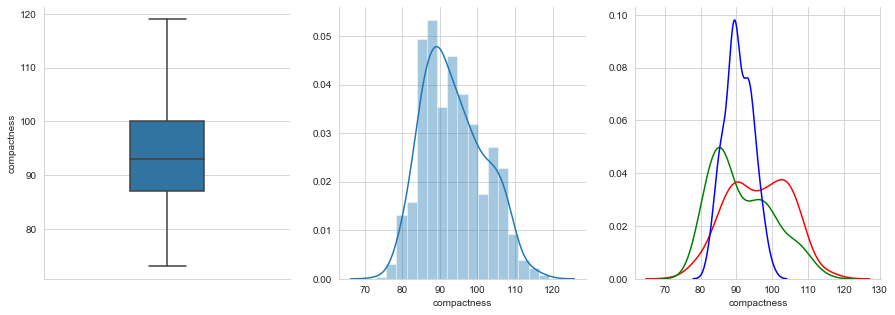

In [14]:
# Analysis of Attribute: compactness
curattr = 'compactness'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )


#### Based on the above we can infer the following

#1.There are no outliers
#2.Mean and Median are very close.
#3.Data seems to be fairly normally distributed, though not fully normally distributed. 
#4.Multiple gaussians noted.

Skewness of circularity distribution = 0.26
Mean of circularity distribution = 44.86
Median of circularity distribution = 44.00
Number of null records in circularity distribution = 0.00
Number of outliers in circularity distribution = 0.00


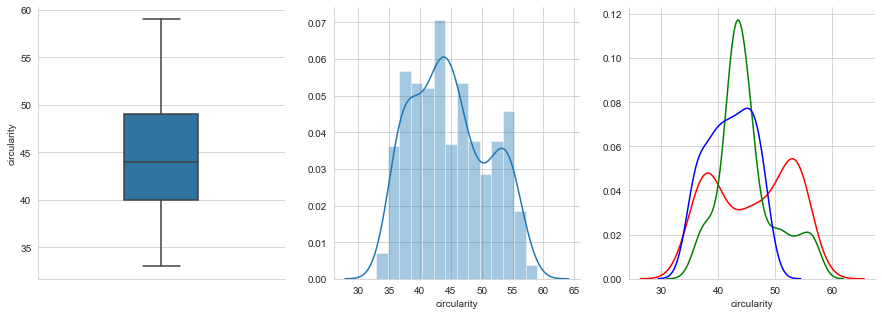

In [15]:
# Analysis of attribute: circularity

curattr = 'circularity'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers
#2.Mean and Median are very close.
#3.Data seems to be fairly normally distributed, though not fully normally distributed. 
#4.Multiple gaussians noted.

Skewness of distance_circularity distribution = 0.11
Mean of distance_circularity distribution = 82.10
Median of distance_circularity distribution = 80.00
Number of null records in distance_circularity distribution = 0.00
Number of outliers in distance_circularity distribution = 0.00


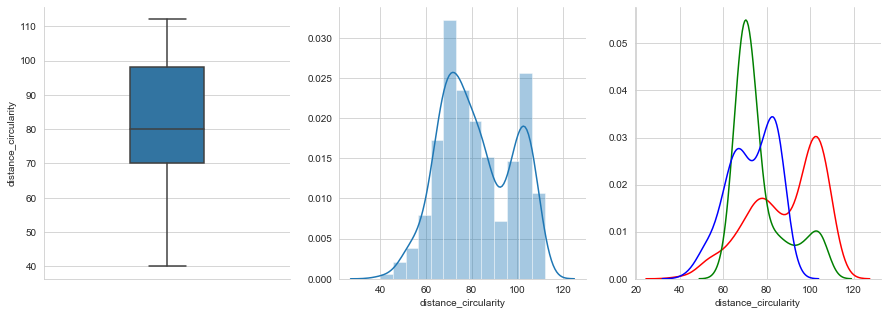

In [16]:
# Analysis of attribute: distance_circularity

curattr = 'distance_circularity'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers
#2.Mean and Median are close.
#3.Multiple gaussians noted.

Skewness of radius_ratio distribution = 0.39
Mean of radius_ratio distribution = 168.95
Median of radius_ratio distribution = 167.00
Number of null records in radius_ratio distribution = 0.00
Number of outliers in radius_ratio distribution = 0.00


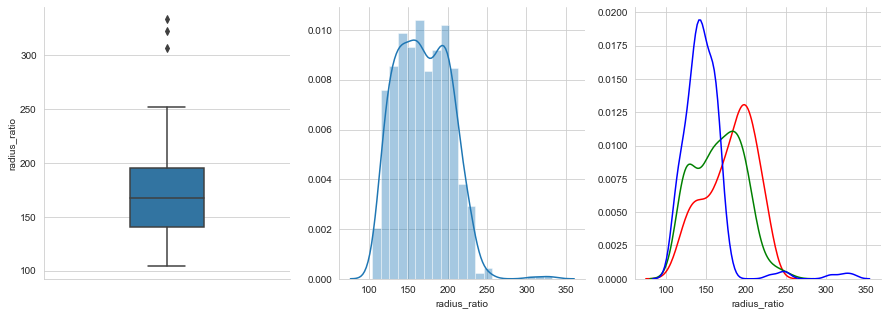

In [17]:
# Analysis of attribute: radius_ratio

curattr = 'radius_ratio'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers
#2.Mean and Median are marginally far.
#3.Data seems to be fairly normally distributed, though not fully normally distributed. 
#4.Multiple gaussians noted.

Skewness of pr.axis_aspect_ratio distribution = 3.82
Mean of pr.axis_aspect_ratio distribution = 61.69
Median of pr.axis_aspect_ratio distribution = 61.00
Number of null records in pr.axis_aspect_ratio distribution = 0.00
Number of outliers in pr.axis_aspect_ratio distribution = 0.00


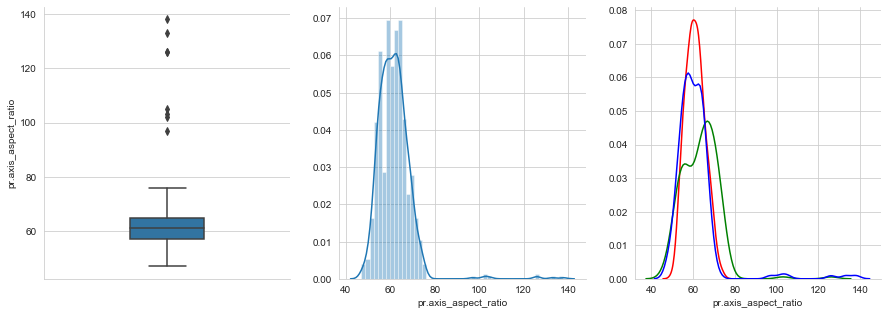

In [18]:
# Analysis of attribute: pr.axis_aspect_ratio

curattr = 'pr.axis_aspect_ratio'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers
#2.Mean and Median are very close.
#3.Data seems to be fairly normally distributed, though not fully normally distributed.
#4.Multiple gaussians noted.
#5.There is significant skewness in data as noted by long tail.

Skewness of max.length_aspect_ratio distribution = 6.78
Mean of max.length_aspect_ratio distribution = 8.57
Median of max.length_aspect_ratio distribution = 8.00
Number of null records in max.length_aspect_ratio distribution = 0.00
Number of outliers in max.length_aspect_ratio distribution = 0.00


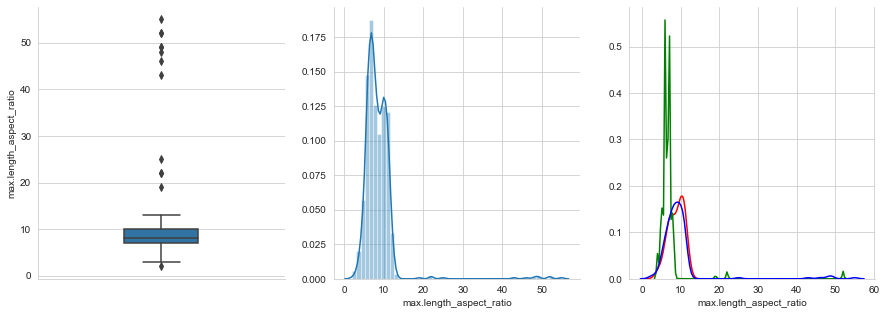

In [19]:
# Analysis of attribute: max.length_aspect_ratio

curattr = 'max.length_aspect_ratio'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers. Range of outliers is also very wide spread.
#2.Mean and Median are very close.
#3.Data seems to be fairly normally distributed, though not fully normally distributed.
#4.Multiple gaussians noted.
#5.There is significant skewness in data as noted by long tail.

Skewness of scatter_ratio distribution = 0.61
Mean of scatter_ratio distribution = 168.84
Median of scatter_ratio distribution = 157.00
Number of null records in scatter_ratio distribution = 0.00
Number of outliers in scatter_ratio distribution = 0.00


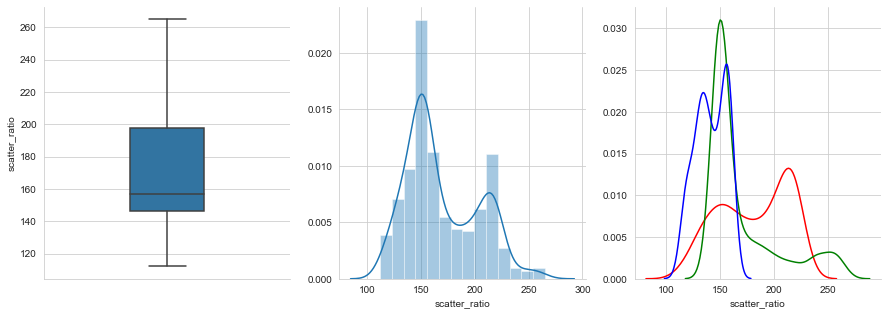

In [20]:
# Analysis of attribute: scatter_ratio

curattr = 'scatter_ratio'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are far. 
#3.Mutiple gaussians noted.

Skewness of elongatedness distribution = 0.05
Mean of elongatedness distribution = 40.93
Median of elongatedness distribution = 43.00
Number of null records in elongatedness distribution = 0.00
Number of outliers in elongatedness distribution = 0.00


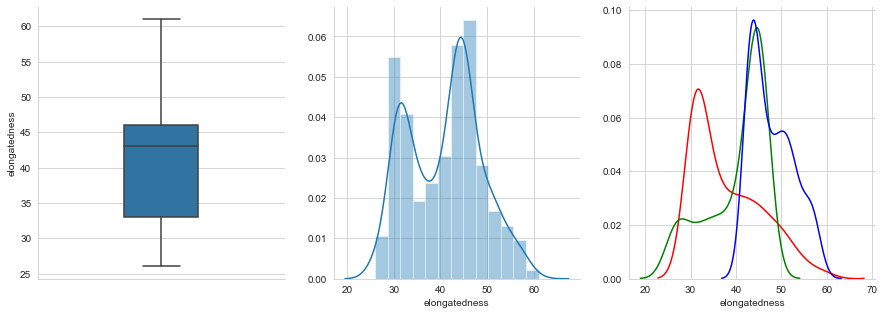

In [21]:
# Analysis of attribute: elongatedness

curattr = 'elongatedness'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are marginally far. 
#3.Mutiple gaussians noted.

Skewness of pr.axis_rectangularity distribution = 0.77
Mean of pr.axis_rectangularity distribution = 20.58
Median of pr.axis_rectangularity distribution = 20.00
Number of null records in pr.axis_rectangularity distribution = 0.00
Number of outliers in pr.axis_rectangularity distribution = 0.00


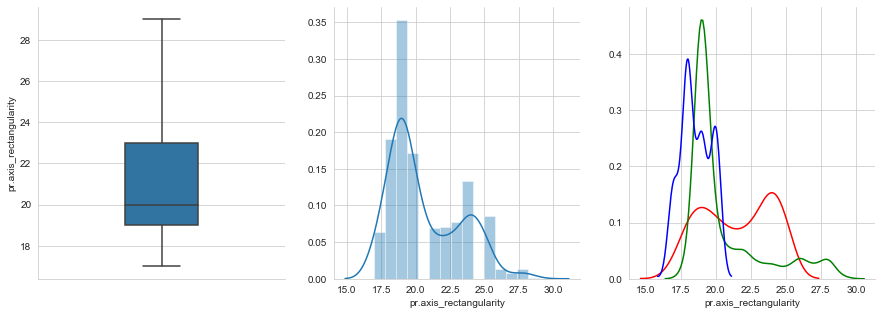

In [22]:
# Analysis of attribute: pr.axis_rectangularity

curattr = 'pr.axis_rectangularity'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are very close. 
#3.Mutiple gaussians noted.

Skewness of max.length_rectangularity distribution = 0.26
Mean of max.length_rectangularity distribution = 148.00
Median of max.length_rectangularity distribution = 146.00
Number of null records in max.length_rectangularity distribution = 0.00
Number of outliers in max.length_rectangularity distribution = 0.00


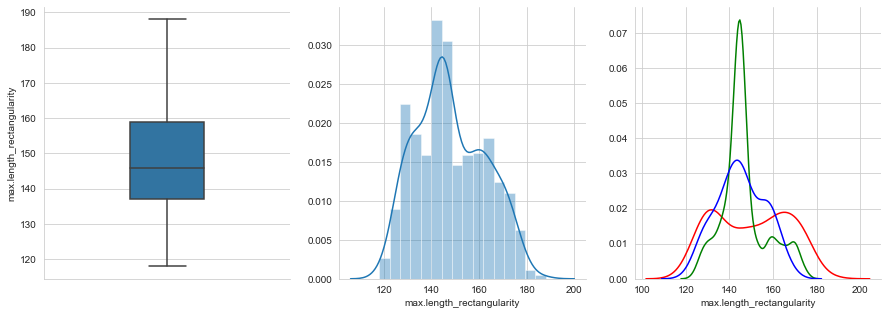

In [23]:
# Analysis of attribute: max.length_rectangularity

curattr = 'max.length_rectangularity'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are marginally far.
#3.Mutiple gaussians noted.

Skewness of scaled_variance distribution = 0.65
Mean of scaled_variance distribution = 188.63
Median of scaled_variance distribution = 178.50
Number of null records in scaled_variance distribution = 0.00
Number of outliers in scaled_variance distribution = 0.00


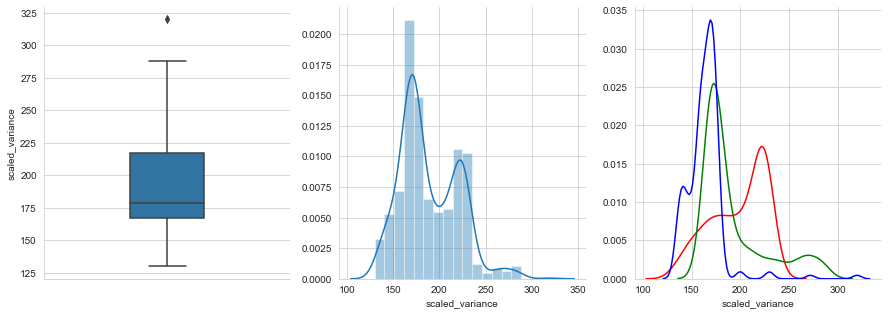

In [24]:
# Analysis of attribute: scaled_variance

curattr = 'scaled_variance'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers.
#2.Mean and Median are far.
#3.Mutiple gaussians noted.

Skewness of scaled_variance.1 distribution = 0.84
Mean of scaled_variance.1 distribution = 439.92
Median of scaled_variance.1 distribution = 364.00
Number of null records in scaled_variance.1 distribution = 0.00
Number of outliers in scaled_variance.1 distribution = 0.00


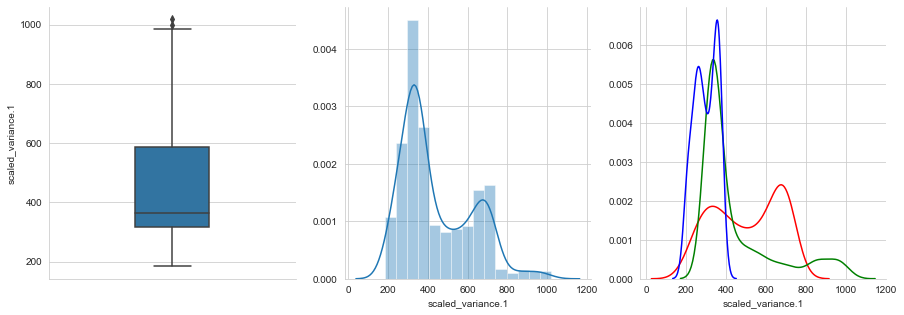

In [25]:
# Analysis of attribute: scaled_variance.1

curattr = 'scaled_variance.1'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers.
#2.Mean and Median are far.
#3.Mutiple gaussians noted.

Skewness of scaled_radius_of_gyration distribution = 0.28
Mean of scaled_radius_of_gyration distribution = 174.71
Median of scaled_radius_of_gyration distribution = 173.50
Number of null records in scaled_radius_of_gyration distribution = 0.00
Number of outliers in scaled_radius_of_gyration distribution = 0.00


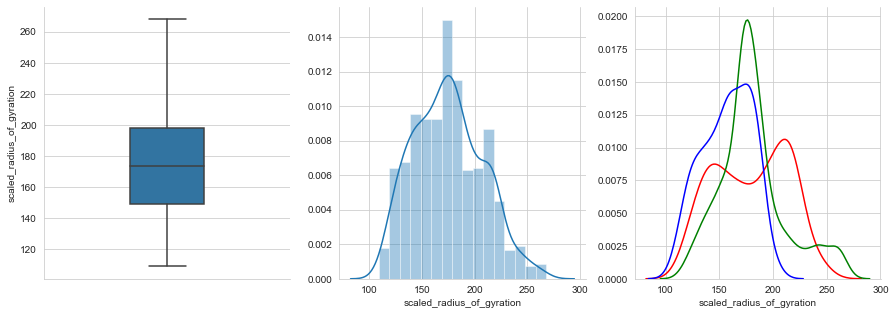

In [26]:
# Analysis of attribute: scaled_radius_of_gyration

curattr = 'scaled_radius_of_gyration'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are marginally far.
#3.Mutiple gaussians noted.

Skewness of scaled_radius_of_gyration.1 distribution = 2.08
Mean of scaled_radius_of_gyration.1 distribution = 72.46
Median of scaled_radius_of_gyration.1 distribution = 71.50
Number of null records in scaled_radius_of_gyration.1 distribution = 0.00
Number of outliers in scaled_radius_of_gyration.1 distribution = 0.00


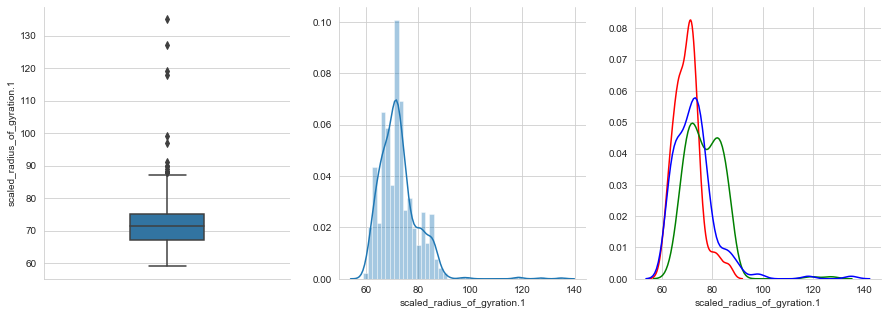

In [27]:
# Analysis of attribute: scaled_radius_of_gyration.1

curattr = 'scaled_radius_of_gyration.1'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers.
#2.Mean and Median are marginally far.
#3.Mutiple gaussians noted.

Skewness of skewness_about distribution = 0.78
Mean of skewness_about distribution = 6.37
Median of skewness_about distribution = 6.00
Number of null records in skewness_about distribution = 0.00
Number of outliers in skewness_about distribution = 0.00


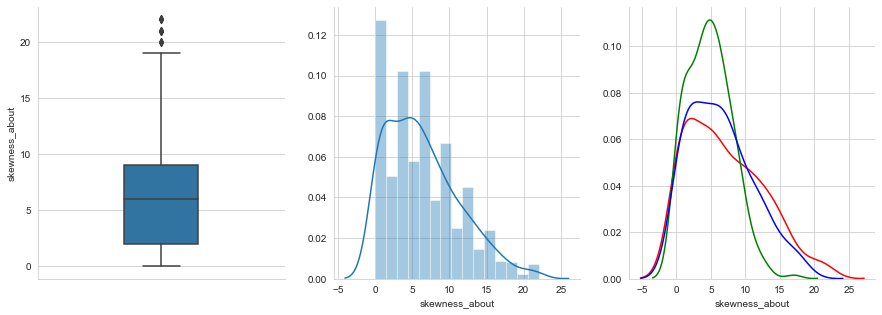

In [28]:
# Analysis of attribute: skewness_about

curattr = 'skewness_about'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers.
#2.Mean and Median are very close.
#3.Mutiple gaussians noted.
#4.There is marginal skewness.

Skewness of skewness_about.1 distribution = 0.69
Mean of skewness_about.1 distribution = 12.60
Median of skewness_about.1 distribution = 11.00
Number of null records in skewness_about.1 distribution = 0.00
Number of outliers in skewness_about.1 distribution = 0.00


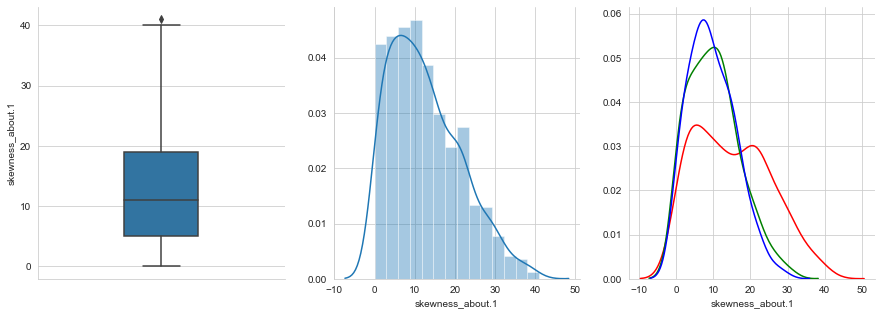

In [29]:
# Analysis of attribute: skewness_about.1

curattr = 'skewness_about.1'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are outliers.
#2.Mean and Median are marginally far.
#3.Mutiple gaussians noted.
#4.There is marginal skewness.

Skewness of skewness_about.2 distribution = 0.25
Mean of skewness_about.2 distribution = 188.93
Median of skewness_about.2 distribution = 188.00
Number of null records in skewness_about.2 distribution = 0.00
Number of outliers in skewness_about.2 distribution = 0.00


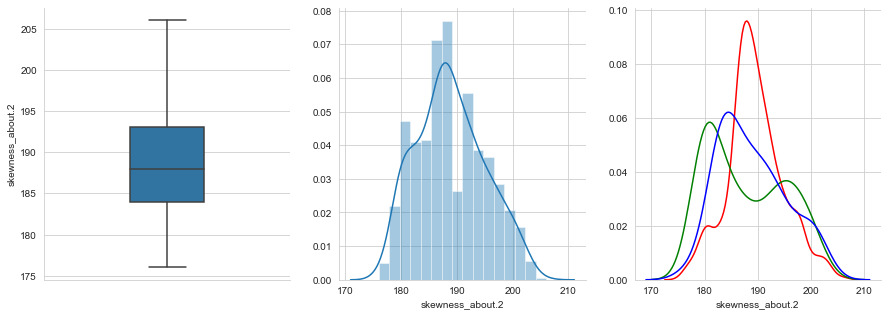

In [30]:
# Analysis of attribute: skewness_about.2

curattr = 'skewness_about.2'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are very close.
#3.Mutiple gaussians noted.
#4.There is marginal skewness.

Skewness of hollows_ratio distribution = -0.23
Mean of hollows_ratio distribution = 195.63
Median of hollows_ratio distribution = 197.00
Number of null records in hollows_ratio distribution = 0.00
Number of outliers in hollows_ratio distribution = 0.00


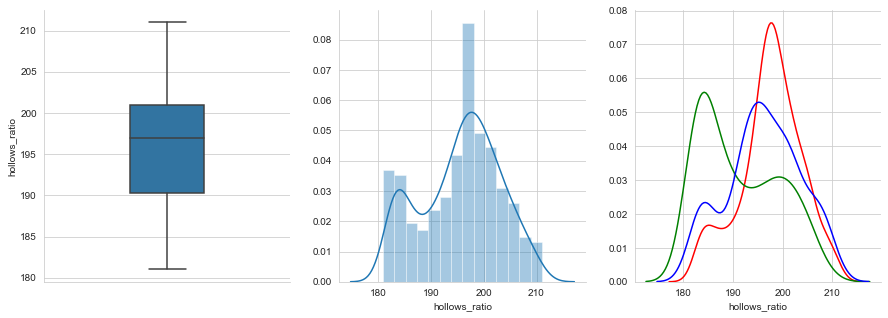

In [31]:
# Analysis of attribute: hollows_ratio

curattr = 'hollows_ratio'
f,axes = plt.subplots(1,3)
sns.boxplot(x = mydata2[curattr],orient = 'v',data = mydata2,width=.3, ax = axes[0])
sns.distplot( mydata2[curattr],ax = axes[1])
sns.distplot( mydata2[mydata2['class'] == 'car'][curattr],hist = False,color = 'r',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'bus'][curattr],hist = False,color = 'g',ax = axes[2])
sns.distplot( mydata2[mydata2['class'] == 'van'][curattr],hist = False,color = 'b',ax = axes[2])
sns.despine()
plt.gcf().set_size_inches(15, 5)
curattr_skew = mydata2[curattr].skew()
curattr_mean = mydata2[curattr].mean()
curattr_med = mydata2[curattr].median()
curattr_null = mydata2[attr].isna().sum()
curattr_outl = outliercount(attr,mydata2)
print('Skewness of ' + curattr +' distribution = %1.2f' %(curattr_skew) )
print('Mean of ' + curattr +' distribution = %1.2f' %(curattr_mean) )
print('Median of ' + curattr +' distribution = %1.2f' %(curattr_med) )
print('Number of null records in ' + curattr +' distribution = %1.2f' %(curattr_null) )
print('Number of outliers in ' + curattr +' distribution = %1.2f' %(curattr_outl) )

#### Based on the above we can infer the following

#1.There are no outliers.
#2.Mean and Median are fairly close.
#3.Mutiple gaussians noted.
#4.There is marginal skewness.

In [32]:
# convert class column to number using LabelEncoder
le=LabelEncoder()
mydata2['class'] = le.fit_transform(mydata2['class'])
mydata2['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### Based on the above we can infer the following

#1.There are 3 classes.
#2.All the classes are not equally represented. Hence class balancing will need to be done for model building.

### Outliers handling:

In [33]:
# Number of outliers in data before handling outliers

attroutl=('radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio',\
              'scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1',\
              'skewness_about','skewness_about.1')

print('Number of outliers:')
print()

for  attr in attroutl:
    print(attr,outliercount(attr,mydata2))
    ;

Number of outliers:

radius_ratio 3
pr.axis_aspect_ratio 8
max.length_aspect_ratio 13
scaled_variance 1
scaled_variance.1 2
scaled_radius_of_gyration.1 15
skewness_about 12
skewness_about.1 1


#1. There are several approaches to handling outliers. 
#2. We will apply 2 techniques here: (1) replacing with class median value  - for some and (2) perform log transformation - for some.

In [34]:
# replacing outliers with class median values 

attrout2=('radius_ratio','skewness_about','skewness_about.1',\
         'pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_radius_of_gyration.1')

for attr in attrout2:
    mydata2['temp'] = mydata2[attr].groupby(mydata2['class']).transform('median')
    rind = mydata2.loc[((mydata2[attr]<(mydata2[attr].quantile(0.25)-(1.5*(mydata2[attr].quantile(0.75) - mydata2[attr].quantile(0.25))))) | (mydata2[attr]>(mydata2[attr].quantile(0.75)+(1.5*(mydata2[attr].quantile(0.75) - mydata2[attr].quantile(0.25))))))].index.values
    cind = mydata2.columns.get_loc(attr)
    mydata2.iloc[rind,cind] = mydata2.loc[rind,'temp']
    mydata2.drop('temp',axis=1,inplace=True)
    ;
   

In [35]:
# replacing outliers with log transformation

attrout3=('scaled_variance','scaled_variance.1')

for attr in attrout3:
    mydata2[attr]=np.log1p(mydata2[attr])
    ;


In [36]:
# Number of outliers in data after handling outliers

attroutl=('radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio',\
              'scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1',\
              'skewness_about','skewness_about.1')

print('Number of outliers:')
print()

for  attr in attroutl:
    print(attr,outliercount(attr,mydata2))
    ;


Number of outliers:

radius_ratio 0
pr.axis_aspect_ratio 0
max.length_aspect_ratio 0
scaled_variance 0
scaled_variance.1 0
scaled_radius_of_gyration.1 0
skewness_about 0
skewness_about.1 0


### Coorelation, Covariance and Pairplot analysis:

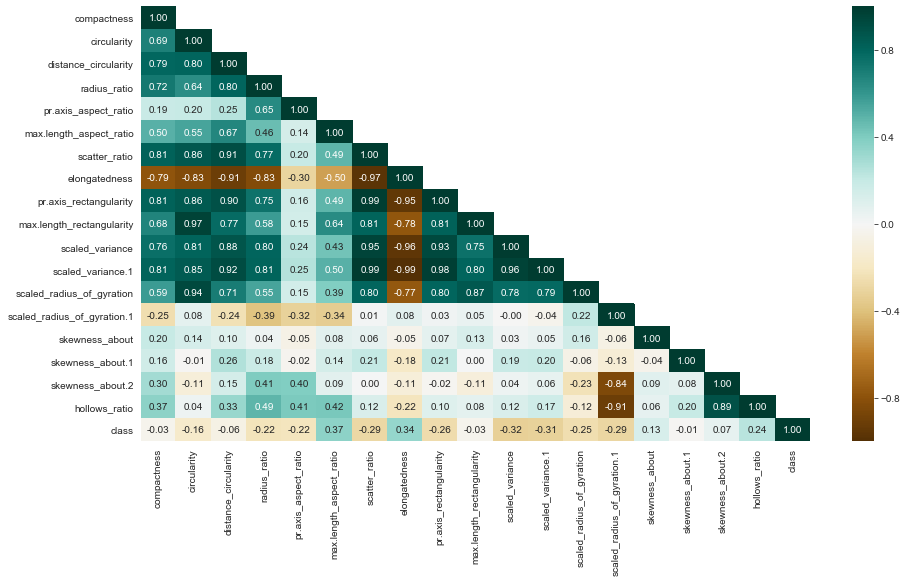

In [37]:
#Correlation analysis

corr = mydata2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, cmap="BrBG",fmt='.2f',vmin=-1,vmax=1)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.gcf().set_size_inches(15, 8)

#### Based on the above we can infer the following 

#1.There is no one single attribute which has very significant correlation with class. However max.length_aspect_ratio and elongatedness seem to show highest positive correlation with class.
#2.Similarly scaled_variance and scaled_variance.1 seem to show highest negative correlation with class.
#3.However, among the attributes, there are several significant correlations observed.For example, scaled_variance and scaled_variance.1 show .96 as correlation. This is clearly showing that one of attribute can be dropped. The exhaustive list of attributes having significant correlation with others is not given in the commentary but can be eazily visually identified following the color coding pattern.
#4.Since there are several attributes with significant correlation with other attributes, there is opportunity to leverage PCA approach to reduce dimensions.

In [38]:
# Covariance matrix to understand the relationship 

s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]

# Feature Scaling
sc= StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.69335835  0.79327313  0.72470299  0.19473373  0.50246531
   0.81396086 -0.78959591  0.81440322  0.67694334  0.76367952  0.8077644
   0.58588022 -0.25432709  0.19744722  0.15671118  0.2983088   0.36598446]
 [ 0.69335835  1.00118343  0.79950738  0.63946291  0.1974549   0.55160333
   0.86107371 -0.82960041  0.85852208  0.9669469   0.81240887  0.85155565
   0.93701505  0.07794839  0.13863738 -0.0139055  -0.11302014  0.03860996]
 [ 0.79327313  0.79950738  1.00118343  0.79904311  0.2465426   0.66618256
   0.9091333  -0.91401596  0.89717636  0.77580926  0.88256253  0.91854222
   0.70688233 -0.23806182  0.10012262  0.26229693  0.14769288  0.33446929]
 [ 0.72470299  0.63946291  0.79904311  1.00118343  0.65346542  0.45788284
   0.77552555 -0.82968726  0.74895914  0.57954617  0.79944455  0.80901936
   0.55259768 -0.38871958  0.03767448  0.18104692  0.40565904  0.48979608]
 [ 0.19473373  0.1974549   0.2465426   0.65346542  1.00118343  0.14223788
   0.19744769

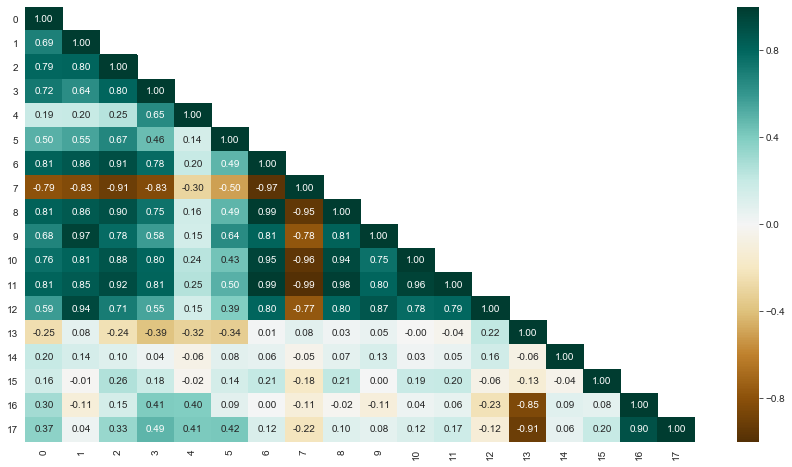

In [39]:
# view the matrix in heatmap view for better readability

df_covmat = pd.DataFrame(cov_matrix)
mask = np.zeros_like(df_covmat)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(df_covmat,mask=mask, annot=True, cmap="BrBG",fmt='.2f',vmin=-1,vmax=1)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.gcf().set_size_inches(15, 8)

#1. It can be observed that this matrix is similar to correlation heatmap.
#2. While correlation matrix/heatmap also shows how the variables interact with both dependent and independent variables, covariance matrix created above gives the heatmap with relationship only among independent variables. Interaction with target variable is not shown above.
#3. Correlation is normalized form of covariance matrix and that is why we see similar values for independant variable interaction.
#4. There are several attributes that interact heavily with each other.
#5. Hence there is scope for dimension reduction.

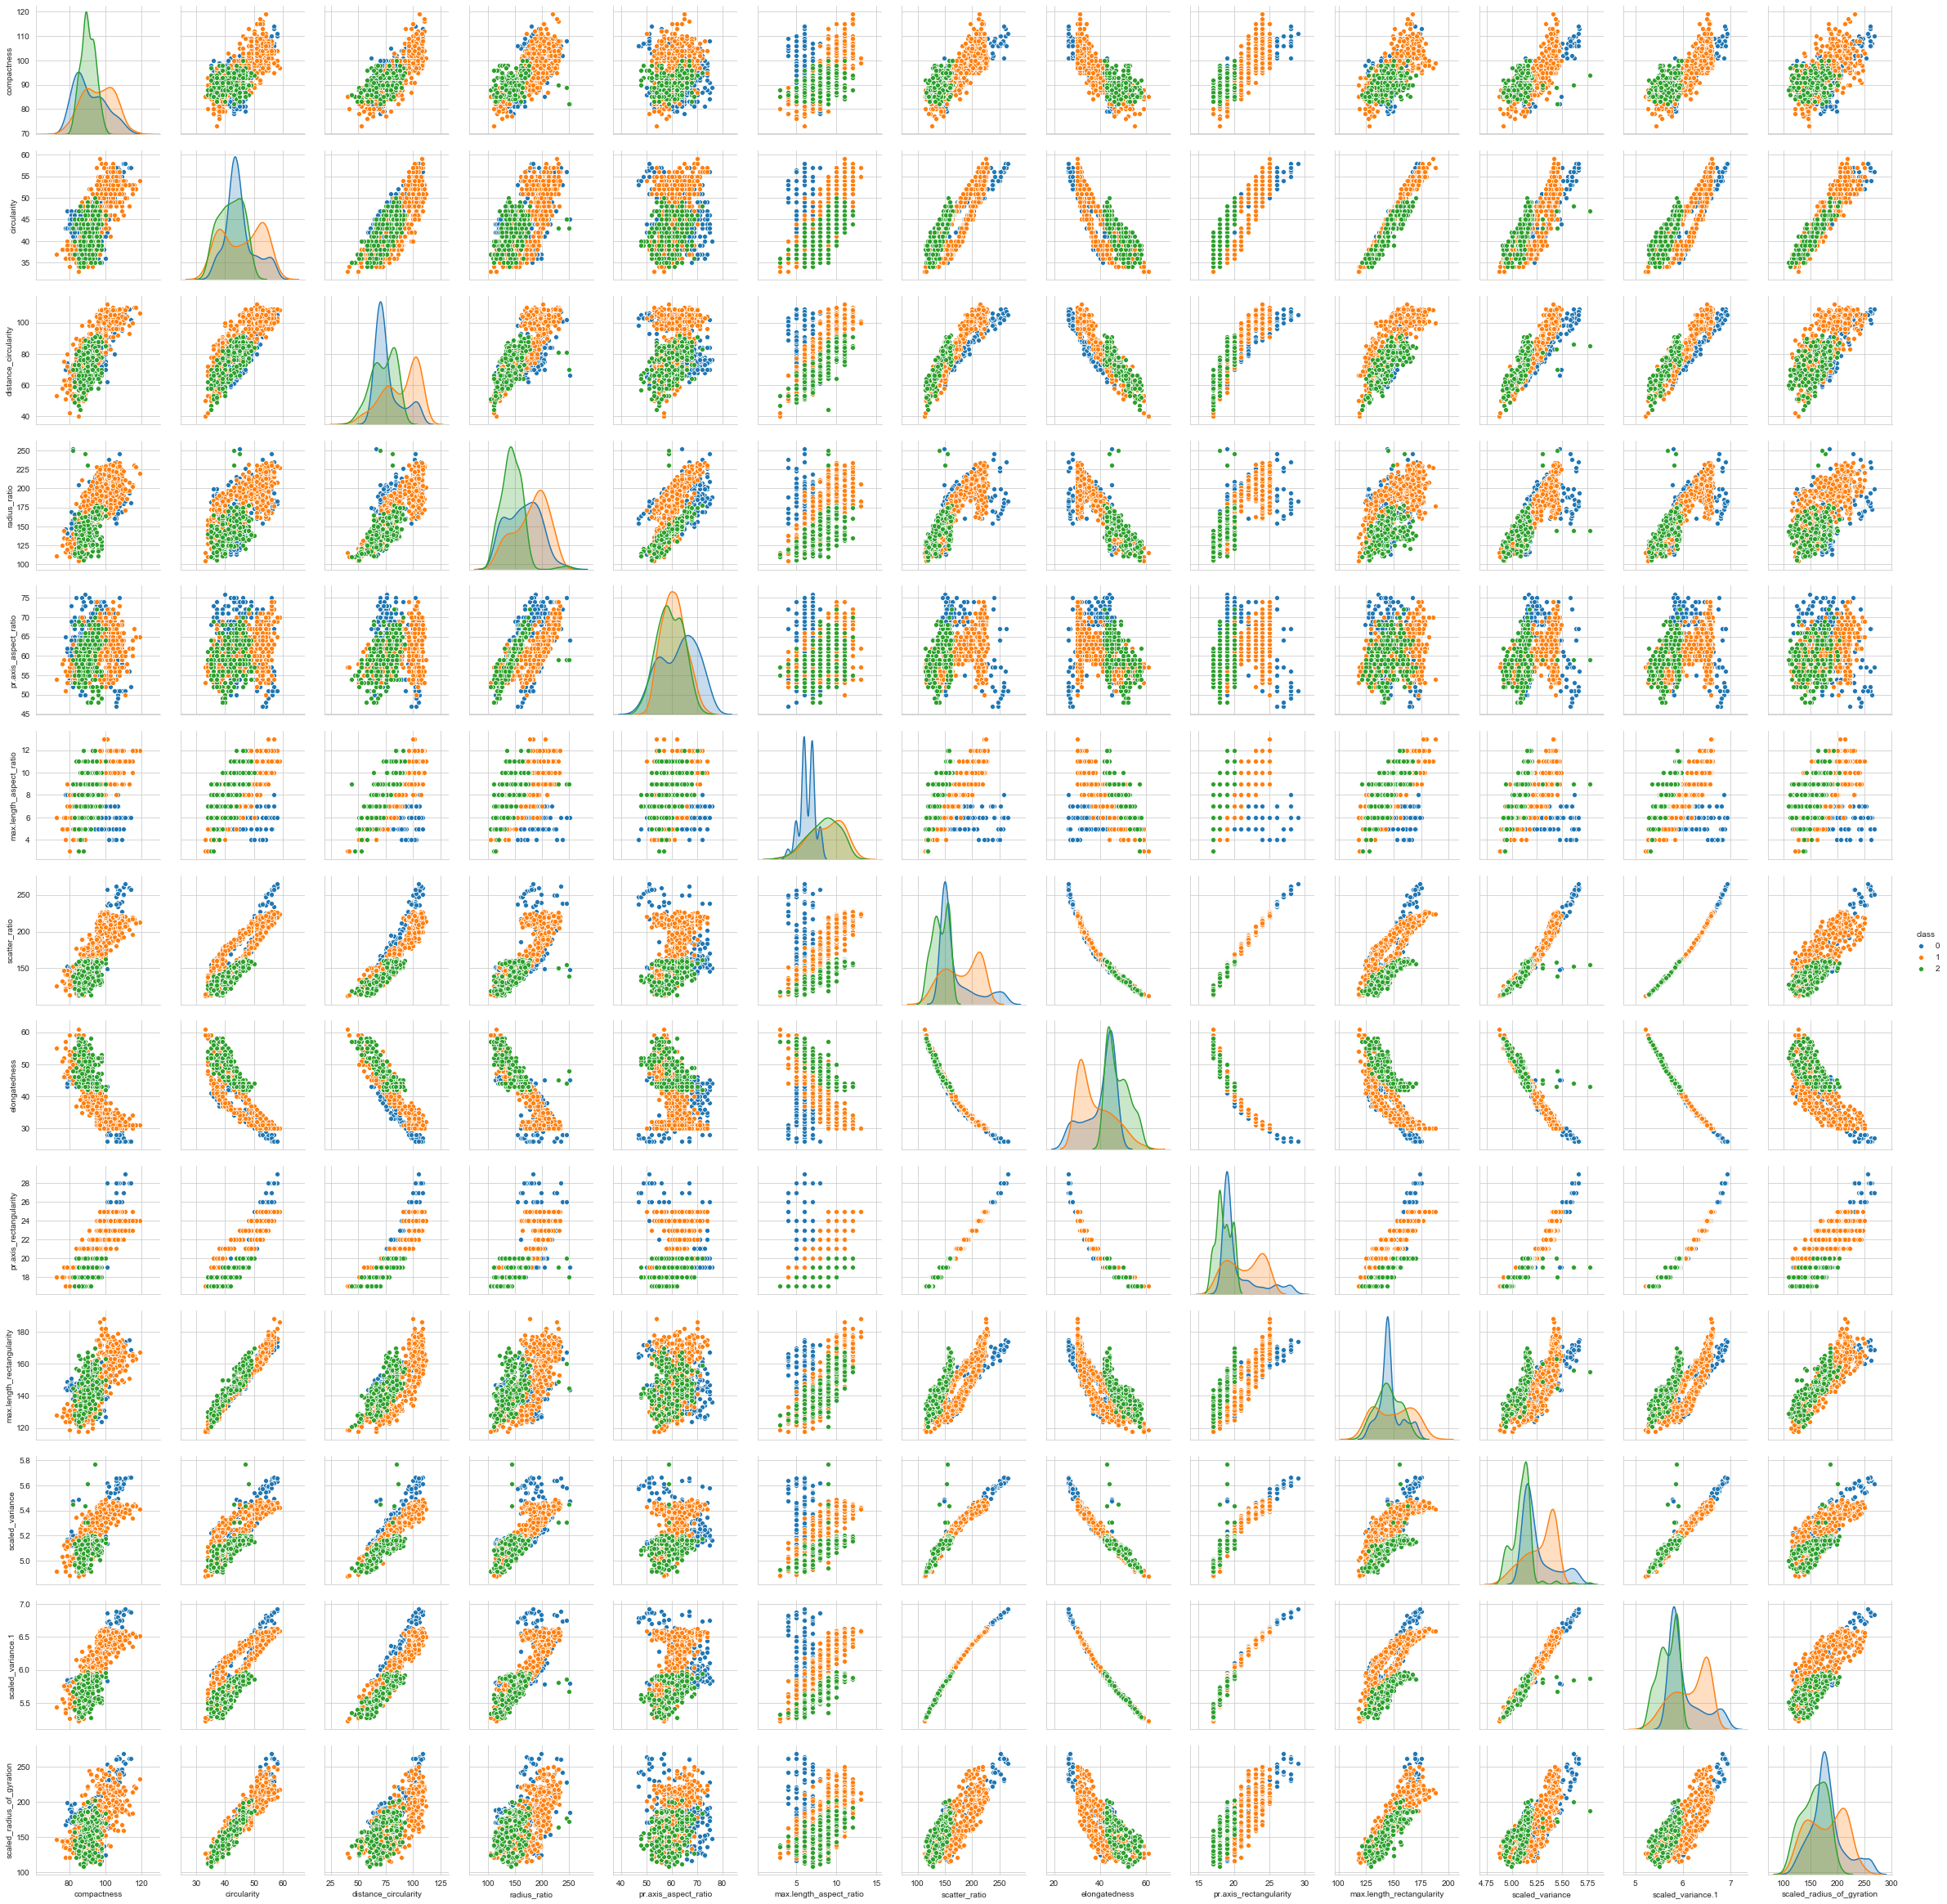

In [40]:
# pairplot
sns.pairplot(data=mydata2,vars=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],diag_kind='kde',hue='class')

#1.Since the attributes list is long it is not feasible to plot pairplot including all variables. 
#2.Hence, for every attribute, list of attribute with correlation of more than 80% is taken and pairplot is given below for the combination of those attributes

In [41]:
# attributes relationship with other attributes where correlation is more than 80% 

mydata2_corr = mydata2.corr().round(2)
col = list(mydata2_corr.columns)
col = col[:-1]

for c in col:

    ind = list(mydata2_corr[c][abs(mydata2_corr[c])>.80 ].sort_values(ascending=False).index.values)
    print('Attribute:' + c)
    print()        
    print(mydata2_corr[c][abs(mydata2_corr[c])>.80 ].sort_values(ascending=False))
    print()
    ; 

Attribute:compactness

compactness               1.00
scaled_variance.1         0.81
pr.axis_rectangularity    0.81
scatter_ratio             0.81
Name: compactness, dtype: float64

Attribute:circularity

circularity                  1.00
max.length_rectangularity    0.97
scaled_radius_of_gyration    0.94
pr.axis_rectangularity       0.86
scatter_ratio                0.86
scaled_variance.1            0.85
scaled_variance              0.81
elongatedness               -0.83
Name: circularity, dtype: float64

Attribute:distance_circularity

distance_circularity      1.00
scaled_variance.1         0.92
scatter_ratio             0.91
pr.axis_rectangularity    0.90
scaled_variance           0.88
elongatedness            -0.91
Name: distance_circularity, dtype: float64

Attribute:radius_ratio

radius_ratio         1.00
scaled_variance.1    0.81
elongatedness       -0.83
Name: radius_ratio, dtype: float64

Attribute:pr.axis_aspect_ratio

pr.axis_aspect_ratio    1.0
Name: pr.axis_aspect_ratio, 

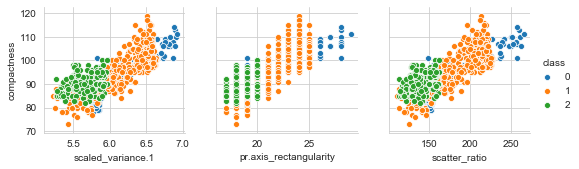

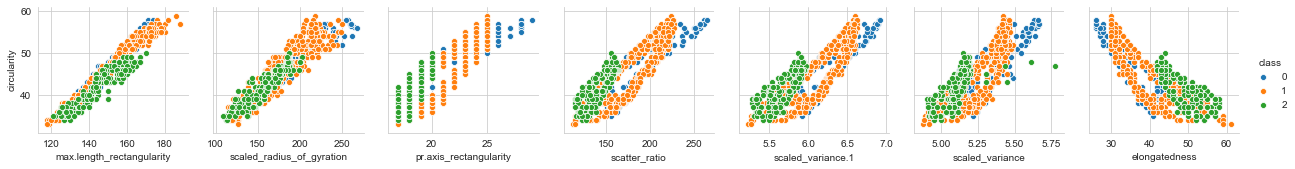

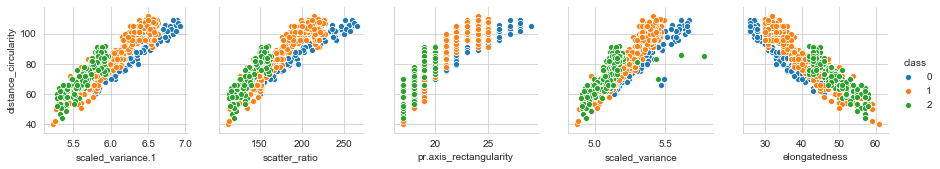

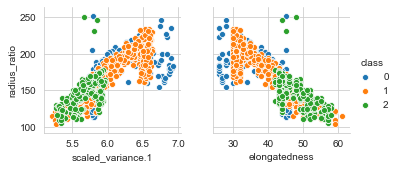

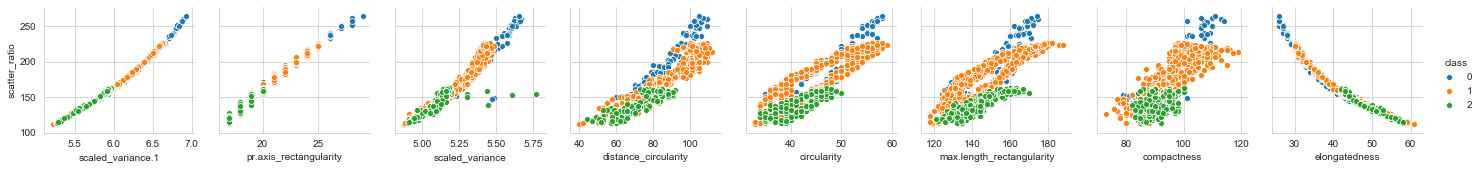

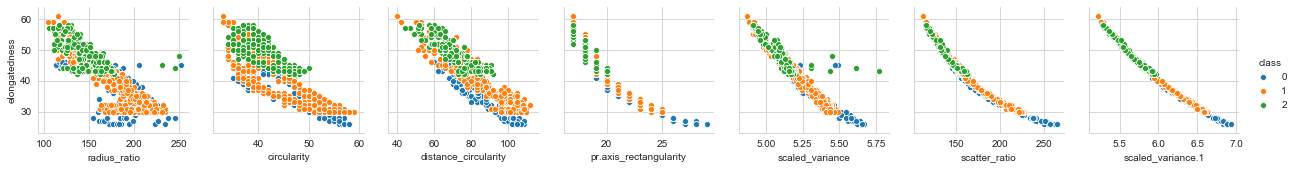

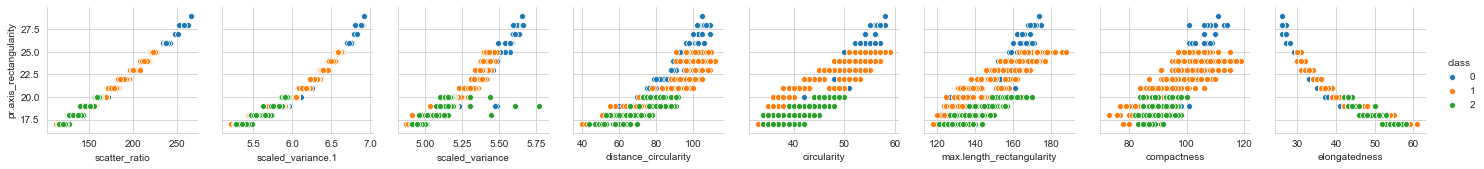

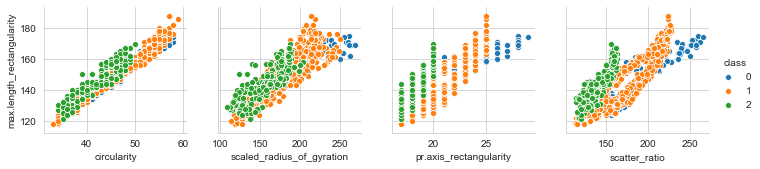

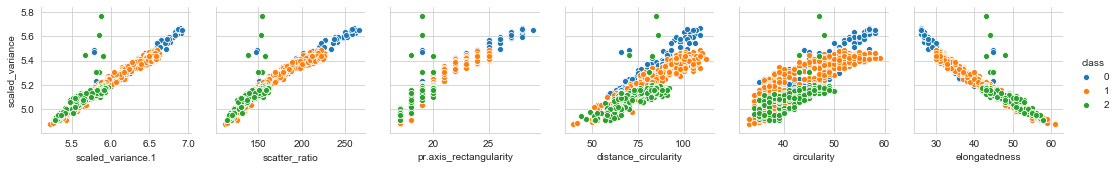

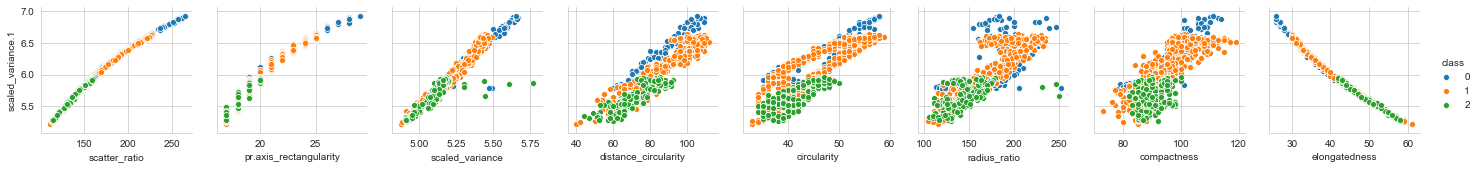

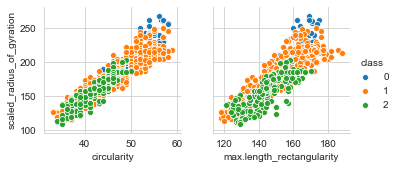

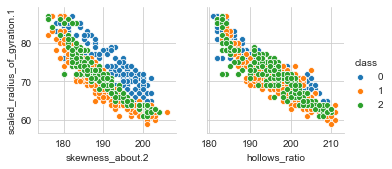

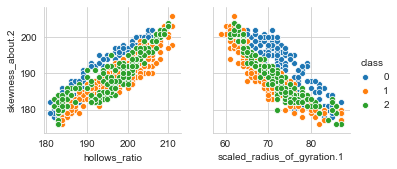

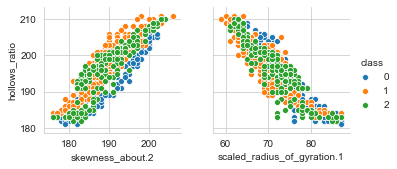

In [42]:
# scatter plot - attributes relationship with other attributes where correlation is more than 80% 


mydata2_corr = mydata2.corr().round(2)
col = list(mydata2_corr.columns)
col = col[:-1]

for c in col:
    ind = mydata2_corr[c][abs(mydata2_corr[c])>.80].sort_values(ascending=False).index.values
    ind2 = np.delete(ind, 0,0)
    if len(ind2)>1:
        sns.pairplot(data=mydata2,hue='class',y_vars=[c],x_vars=(ind2))
    else:
        pass
    ; 

#1. The above chart clearly shows high level of correlation between the plotted attributes.
#2. This gives scope for using PCA as a technique to reduce dimensions

## 4. Feature Selection 

In [43]:
# Using RFE for feature selection

mydata2_z = mydata2.apply(zscore)
arrayX=mydata2_z.values
arrayy=mydata2.values
tind=len(mydata2_z.columns)-1
X=arrayX[:,0:tind]
y=arrayy[:,[tind]]
classifier = LogisticRegression(random_state=9,solver='lbfgs',max_iter=20000)
rfe = RFE(classifier,n_features_to_select =7)
rfe = rfe.fit(X,y.ravel())
rfesupport=pd.DataFrame(rfe.support_)
rferanking=pd.DataFrame(rfe.ranking_)
features=pd.DataFrame(mydata2_z.columns)
RFEFeatureScore=pd.concat([features,rfesupport,rferanking],axis=1)
RFEFeatureScore.columns=['Feature','Support','Ranking']
RFEFeatureScore.sort_values(by='Ranking')

Feature Support  Ranking
3                  radius_ratio    True      1.0
4          pr.axis_aspect_ratio    True      1.0
5       max.length_aspect_ratio    True      1.0
6                 scatter_ratio    True      1.0
7                 elongatedness    True      1.0
9     max.length_rectangularity    True      1.0
10              scaled_variance    True      1.0
11            scaled_variance.1   False      2.0
16             skewness_about.2   False      3.0
13  scaled_radius_of_gyration.1   False      4.0
2          distance_circularity   False      5.0
8        pr.axis_rectangularity   False      6.0
17                hollows_ratio   False      7.0
0                   compactness   False      8.0
12    scaled_radius_of_gyration   False      9.0
1                   circularity   False     10.0
14               skewness_about   False     11.0
15             skewness_about.1   False     12.0
18                        class     NaN      NaN

In [44]:
flist_rfe = RFEFeatureScore['Feature'][RFEFeatureScore.Support==True].tolist()
print('List of features as per RFE:')
print()
print(flist_rfe)

List of features as per RFE:

['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'max.length_rectangularity', 'scaled_variance']


In [45]:
# Using Decision Tree for feature importance identification 

s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]


#creating train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)


# Class balancing using SMOTE
sm = SMOTE(random_state=9)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())

# Train and test the model


seed = 9

model = DecisionTreeClassifier(criterion='entropy',random_state=seed)
model.fit(X_train_bal, y_train_bal)
colm=np.array(mydata2.columns[0:-1])
df_fimp=pd.DataFrame(np.array([model.feature_importances_]),columns=colm)
df_fimp.sort_values(ascending=False,by=0,axis=1).transpose().round(2)

0
elongatedness                0.43
max.length_aspect_ratio      0.30
distance_circularity         0.05
max.length_rectangularity    0.05
pr.axis_aspect_ratio         0.03
pr.axis_rectangularity       0.03
scaled_radius_of_gyration.1  0.03
skewness_about               0.02
scaled_radius_of_gyration    0.01
skewness_about.1             0.01
hollows_ratio                0.01
radius_ratio                 0.01
circularity                  0.01
scaled_variance.1            0.01
scaled_variance              0.00
compactness                  0.00
skewness_about.2             0.00
scatter_ratio                0.00

In [46]:
df_temp = df_fimp[df_fimp>0.02].dropna(axis=1)
df_temp.head(10)
flist_dt = list(df_temp.columns)
print('List of features as per DT:')
print()
print(flist_dt)

List of features as per DT:

['distance_circularity', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_radius_of_gyration.1']


In [47]:
# Using Stepforward selection method to select features

s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]


#creating train test split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)
 

# Class balancing using SMOTE

sm = SMOTE(random_state=9)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())


# Train and test the model

seed = 9
n_jobs=4
pre_dispatch=8
scoring='accuracy'
cv=5

model = SVC(C=1,gamma='scale',kernel='rbf',random_state=seed,probability=False)

# model build

sfs1 = sfs(model,k_features=7,forward=True,floating=False,verbose=0,scoring=scoring,cv=cv,n_jobs=n_jobs)
sfs1 = sfs1.fit(X_train_bal, y_train_bal)

feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

col_list = list(mydata2.columns)
flist_sfs = [col_list[i] for i in feat_cols]
print()
print('List of features as per SFS:')
print()
print(flist_sfs)

[0, 1, 2, 4, 6, 9, 13]

List of features as per SFS:

['compactness', 'circularity', 'distance_circularity', 'pr.axis_aspect_ratio', 'scatter_ratio', 'max.length_rectangularity', 'scaled_radius_of_gyration.1']


In [48]:
# dataframe to compare the selection of features under various methods
 
collist = mydata2.columns.tolist()
collist.remove('class')
collist.sort
df_features = pd.DataFrame()
df_features['Features'] = collist

for rlist in flist_rfe:
    df_features['RFE'] = df_features['Features'].apply(lambda x : 'Yes' if  ( x in  flist_rfe) else '' )
    ;

for sfslist in flist_sfs:
    df_features['SFS'] = df_features['Features'].apply(lambda x : 'Yes' if  ( x in  flist_sfs) else '' )
    ;

for dtlist in flist_dt:
    df_features['DT'] = df_features['Features'].apply(lambda x : 'Yes' if  ( x in  flist_dt) else '' )
    ;    

df_features['RFE'].replace('', np.nan, inplace=True)
df_features['SFS'].replace('', np.nan, inplace=True)
df_features['DT'].replace('', np.nan, inplace=True)
df_features.dropna(thresh=2, inplace=True)
df_features['RFE'].replace(np.nan,'', inplace=True)
df_features['SFS'].replace(np.nan,'',inplace=True)
df_features['DT'].replace(np.nan,'',inplace=True)
df_features.head(20)

Features  RFE  SFS   DT
0                   compactness       Yes     
1                   circularity       Yes     
2          distance_circularity       Yes  Yes
3                  radius_ratio  Yes          
4          pr.axis_aspect_ratio  Yes  Yes  Yes
5       max.length_aspect_ratio  Yes       Yes
6                 scatter_ratio  Yes  Yes     
7                 elongatedness  Yes       Yes
8        pr.axis_rectangularity            Yes
9     max.length_rectangularity  Yes  Yes  Yes
10              scaled_variance  Yes          
13  scaled_radius_of_gyration.1       Yes  Yes

#1.The above is a comparison of 7 features selected by various approach.
#2.As we can see, feature list selected is different in each one of the approaches. 
#3.There are some features that are selected in all approaches.

Number of features for > .95 level is: 7



For number of components = 1,  percentage variance explained = 54.50
For number of components = 2,  percentage variance explained = 73.10
For number of components = 3,  percentage variance explained = 79.68
For number of components = 4,  percentage variance explained = 86.03
For number of components = 5,  percentage variance explained = 90.88
For number of components = 6,  percentage variance explained = 94.49
For number of components = 7,  percentage variance explained = 96.25



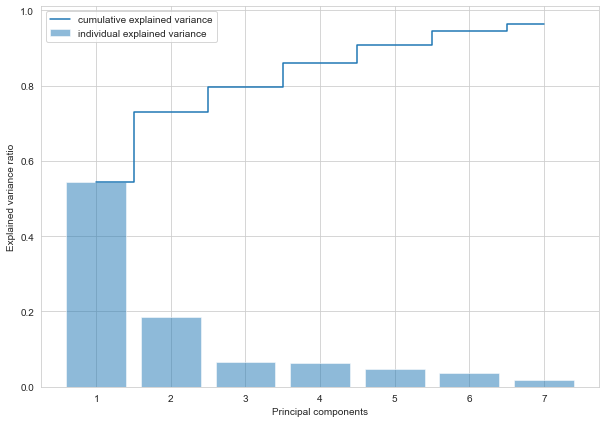

In [49]:
# Using PCA for checking spread of features for 95% variance explanation

s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]

# Feature Scaling
sc= StandardScaler()
X_std= sc.fit_transform(X)


pca = PCA(.95)
X_std = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_ratio_
print("Number of features for > .95 level is: %s" % pca.n_components_)
print()
print()
plt.bar(range(1,8), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),np.cumsum(pca.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.gcf().set_size_inches(10, 7)
print()
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('For number of components = %d,  percentage variance explained = %1.2f' %(index+1,np.round(var,2)))
    ;
print()

#### Based on the above we can infer the following 
#1. With 7 components we can explain more than 95% variance in data.


## 5. Model Building and Evaluation

In [50]:
#setting up common parameters
seed = 9
n_jobs=4
pre_dispatch=8
scoring='accuracy'
cv=5

In [51]:
# setting up dataframes for evaluation

#mydata2 - data with all features

#mydata_rfe
mydata_rfe = mydata2[flist_rfe].copy(deep=True)
mydata_rfe['class'] = mydata2['class'].copy(deep=True)

#mydata_dt
mydata_dt = mydata2[flist_dt].copy(deep=True)
mydata_dt['class'] = mydata2['class'].copy(deep=True)

#mydata_sfs
mydata_sfs = mydata2[flist_sfs].copy(deep=True)
mydata_sfs['class'] = mydata2['class'].copy(deep=True)

dflist= [mydata2,mydata_rfe,mydata_dt,mydata_sfs]

### 5.1 Base Model evaluation without hyper parameter tuning

In [52]:
counter = 0

for s in dflist:
    print('Counter:',counter)
    tind=len(s.columns)-1
    array=s.values
    X=array[:,0:tind]
    y=array[:,[tind]]

    #creating train test split

    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)

    # Feature Scaling

    sc= StandardScaler()
    X_train= sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Class balancing using SMOTE

    sm = SMOTE(random_state=9)
    X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())


    # Train and test the model

    start_time=time.time()
    
    model = SVC(C=1,gamma='scale',kernel='rbf',random_state=seed,probability=False)
    model.fit(X_train_bal, y_train_bal)
    y_predict = model.predict(X_test)

    # Model evaluation

    accuracy_score = metrics.accuracy_score(y_test,y_predict)
    matrix=metrics.confusion_matrix(y_test,y_predict)
    recall_score = metrics.recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
    precision_score = metrics.precision_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
    f1_score = metrics.f1_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)

    #cross validation score on full data set
    cv_score_base = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs,pre_dispatch=pre_dispatch,scoring=scoring)
    cv_score = np.round(cv_score_base.mean(),4)
    cv_score_sd = np.round(cv_score_base.std(),4)
    cv_range =np.round(cv_score_base.mean()- 2*cv_score_base.std(),2),'to', np.round(cv_score_base.mean()+ 2*cv_score_base.std(),2)

    et=round(time.time()-start_time,2)

    if counter == 0:
        variant= 'All Features'
    elif counter == 1:
        variant= 'Features per RFE'
    elif counter == 2:
        variant= 'Features per DT'
    else:
        variant= 'Features per SFS'


    # Updating model evaluation output dataframe      

    print(model.__class__.__name__ + variant + '  completed in',et, 'seconds')     


    curmodeloutput = {'Model':model.__class__.__name__,
                      'Variant':variant,
                      'Precision':precision_score,
                      'Recall':recall_score,
                      'F1':f1_score,
                      'Accuracy':accuracy_score,
                      'CM':matrix,
                      'CV Mean Accuracy':cv_score,
                      'Acc range @95% CL':cv_range
                     }

 
    modelevalcompdf = modelevalcompdf.append(curmodeloutput,ignore_index=True)
    counter = counter+1
    ;

Counter: 0
SVCAll Features  completed in 0.1 seconds
Counter: 1
SVCFeatures per RFE  completed in 0.07 seconds
Counter: 2
SVCFeatures per DT  completed in 0.06 seconds
Counter: 3
SVCFeatures per SFS  completed in 0.06 seconds


### 5.2 Hyper parameter tuning for base models

In [53]:
counter = 0

for s in dflist:

    print('Counter:',counter)
    tind=len(s.columns)-1
    array=s.values
    X=array[:,0:tind]
    y=array[:,[tind]]


    #creating train test split
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)

    # Feature Scaling
    sc= StandardScaler()
    X_train= sc.fit_transform(X_train)
    X_test = sc.transform(X_test)


    # Class balancing using SMOTE
    sm = SMOTE(random_state=9)
    X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())


    #GridsearchCV tuning for SVC

    param_grid={'gamma':(0.01,0.001,0.0001),'C':(1,10,100,1000,10000),'kernel':('rbf','linear')}
    estimator=SVC(random_state=seed)
    svc_t = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=cv,n_jobs=n_jobs,scoring=scoring)
    start_time=time.time()
    svc_t.fit(X_train_bal, y_train_bal.ravel())
    y_predict = svc_t.predict(X_test)

    print('Best parameter for SVC is',svc_t.best_params_)
    print('Best estimator for SVC is',svc_t.best_estimator_)
    print('Best score for SVC is',svc_t.best_score_)


    et=round(time.time()-start_time,2)   

    if counter == 0:
        variant= 'All Features'
    elif counter == 1:
        variant= 'Features per RFE'
    elif counter == 2:
        variant= 'Features per DT'
    else:
        variant= 'Features per SFS'

 
    # Updating model evaluation output dataframe      

    print(model.__class__.__name__ + variant + '  tuning completed in',et, 'seconds')     

    counter = counter+1
    ;

Counter: 0


/Users/sridharkrishnan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter for SVC is {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator for SVC is SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False)
Best score for SVC is 0.9817351598173516
SVCAll Features  tuning completed in 48.92 seconds
Counter: 1


/Users/sridharkrishnan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter for SVC is {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator for SVC is SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False)
Best score for SVC is 0.9703196347031964
SVCFeatures per RFE  tuning completed in 39.88 seconds
Counter: 2


/Users/sridharkrishnan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameter for SVC is {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator for SVC is SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False)
Best score for SVC is 0.9668949771689498
SVCFeatures per DT  tuning completed in 70.64 seconds
Counter: 3
Best parameter for SVC is {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator for SVC is SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False)
Best score for SVC is 0.9657534246575342
SVCFeatures per SFS  tuning completed in 117.07 seconds


/Users/sridharkrishnan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 5.3 Base Model evaluation with hyper parameter tuning 

In [54]:
counter = 0

for s in dflist:

    print('Counter:',counter)
    tind=len(s.columns)-1
    array=s.values
    X=array[:,0:tind]
    y=array[:,[tind]]


    #creating train test split

    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9) 

    # Feature Scaling

    sc= StandardScaler()
    X_train= sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Class balancing using SMOTE

    sm = SMOTE(random_state=9)
    X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())

    # Train and test the model

    start_time=time.time()

    if counter == 0:
        model = SVC(C=100,gamma=0.01,kernel='rbf',random_state=seed,probability=False)
    else:
        model = SVC(C=10000,gamma=0.01,kernel='rbf',random_state=seed,probability=False)


    model.fit(X_train_bal, y_train_bal)
    y_predict = model.predict(X_test)

    # Model evaluation

    accuracy_score = metrics.accuracy_score(y_test,y_predict)
    matrix=metrics.confusion_matrix(y_test,y_predict)
    recall_score = metrics.recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
    precision_score = metrics.precision_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
    f1_score = metrics.f1_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)


    #cross validation score on full data set

    cv_score_base = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs,pre_dispatch=pre_dispatch,scoring=scoring)
    cv_score = np.round(cv_score_base.mean(),4)
    cv_score_sd = np.round(cv_score_base.std(),4)
    cv_range =np.round(cv_score_base.mean()- 2*cv_score_base.std(),2),'to', np.round(cv_score_base.mean()+ 2*cv_score_base.std(),2)

    et=round(time.time()-start_time,2)   

    if counter == 0:
        variant= 'All Features-tuned'
    elif counter == 1:
        variant= 'Features per RFE-tuned '
    elif counter == 2:
        variant= 'Features per DT-tuned'
    else:

        variant= 'Features per SFS-tuned'
 

    # Updating model evaluation output dataframe      

    print(model.__class__.__name__ + variant + '  completed in',et, 'seconds')     


    curmodeloutput = {'Model':model.__class__.__name__,
                      'Variant':variant,
                      'Precision':precision_score,
                      'Recall':recall_score,
                      'F1':f1_score,
                      'Accuracy':accuracy_score,
                      'CM':matrix,
                      'CV Mean Accuracy':cv_score,
                      'Acc range @95% CL':cv_range
                     }


    modelevalcompdf = modelevalcompdf.append(curmodeloutput,ignore_index=True)
    counter = counter+1
    ;

Counter: 0
SVCAll Features-tuned  completed in 0.15 seconds
Counter: 1
SVCFeatures per RFE-tuned   completed in 0.09 seconds
Counter: 2
SVCFeatures per DT-tuned  completed in 0.07 seconds
Counter: 3
SVCFeatures per SFS-tuned  completed in 0.1 seconds


### 5.4 Model with PCA

In [55]:
s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]


# Feature Scaling
sc= StandardScaler()
X_std= sc.fit_transform(X)


pca = PCA(.95)
X_std_p = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_ratio_



print('eigen values ')
print()
print(pca.explained_variance_) 
print()
print('eigen values ratio')
print()
print(pca.explained_variance_ratio_) 
print()
print('eigen vectors')
print()
print(pca.components_) 


P_reduce = np.array(pca.components_)
X_std_7D = np.dot(X_std,P_reduce.T)
mydata_pca = pd.DataFrame(X_std_7D)

mydata_pca.head()

tind=len(mydata_pca.columns)
array=mydata_pca.values
X=array[:,0:tind]

#creating train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)


# Class balancing using SMOTE
sm = SMOTE(random_state=9)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())

# Train and test the model

model = SVC(C=100,gamma='scale',kernel='rbf',random_state=seed,probability=False)


start_time=time.time() 

model.fit(X_train_bal, y_train_bal)
#model.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Model evaluation

accuracy_score = metrics.accuracy_score(y_test,y_predict)
matrix=metrics.confusion_matrix(y_test,y_predict)
recall_score = metrics.recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
precision_score = metrics.precision_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
f1_score = metrics.f1_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)



#cross validation score on full data set
cv_score_base = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs,pre_dispatch=pre_dispatch,scoring=scoring)
cv_score = np.round(cv_score_base.mean(),4)
cv_score_sd = np.round(cv_score_base.std(),4)
cv_range =np.round(cv_score_base.mean()- 2*cv_score_base.std(),2),'to', np.round(cv_score_base.mean()+ 2*cv_score_base.std(),2)



et=round(time.time()-start_time,2)

# Updating model evaluation output dataframe       

print(model.__class__.__name__+ '  completed in',et, 'seconds')      

curmodeloutput = {'Model':model.__class__.__name__,
                  'Variant':'PCA - without tuning',
                  'Precision':precision_score,
                  'Recall':recall_score,
                  'F1':f1_score,
                  'Accuracy':accuracy_score,
                  'CM':matrix,
                  'CV Mean Accuracy':cv_score,
                  'Acc range @95% CL':cv_range                  
                 } 

modelevalcompdf = modelevalcompdf.append(curmodeloutput,ignore_index=True)



eigen values 

[9.82207773 3.35073797 1.18618162 1.14423644 0.87386003 0.65146642
 0.31779028]

eigen values ratio

[0.54502598 0.18593207 0.06582108 0.06349355 0.04849039 0.0361498
 0.01763415]

eigen vectors

[[-0.27080813 -0.28731985 -0.30232957 -0.2704507  -0.10043057 -0.19527482
  -0.30906935  0.30883607 -0.30540141 -0.27645976 -0.29968132 -0.31113773
  -0.26120145  0.04545458 -0.03549027 -0.05775163 -0.0400142  -0.08739287]
 [-0.08459371  0.14396701 -0.04257097 -0.19152772 -0.25130571 -0.10361337
   0.07913205 -0.01823432  0.09211707  0.12870695  0.06456629  0.04922008
   0.21693998  0.50556606 -0.01635155 -0.09515976 -0.50294602 -0.50651523]
 [ 0.06266759  0.18790129 -0.05521253 -0.08238278 -0.00443084  0.15745244
  -0.10538805  0.10081595 -0.09881682  0.20786111 -0.13530146 -0.1037557
   0.18916004 -0.09018584  0.61753393 -0.62418678  0.07038966  0.05458385]
 [ 0.13145373 -0.0474735   0.11946921 -0.24904631 -0.6203232   0.28821953
   0.01717381  0.05530649  0.04368222  0.032821

In [56]:
s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]


# Feature Scaling
sc= StandardScaler()
X_std= sc.fit_transform(X)


pca = PCA(.95)
X_std_p = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_ratio_


P_reduce = np.array(pca.components_)
X_std_7D = np.dot(X_std,P_reduce.T)
mydata_pca = pd.DataFrame(X_std_7D)

mydata_pca.head()

tind=len(mydata_pca.columns)
array=mydata_pca.values
X=array[:,0:tind]

#creating train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)


# Class balancing using SMOTE
sm = SMOTE(random_state=9)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())

#GridsearchCV tuning for SVC ( with parameters as given in assignment)

param_grid={'C':(0.01, 0.05, 0.5, 1),'kernel':('rbf','linear')} 
estimator=SVC(random_state=seed)
svc_t = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=cv,n_jobs=n_jobs,scoring=scoring)
start_time=time.time() 
svc_t.fit(X_train_bal, y_train_bal.ravel())
y_predict = svc_t.predict(X_test)
print('Best parameter as per parameters as given in assignment')
print()
print('Best parameter for SVC is',svc_t.best_params_)
print('Best estimator for SVC is',svc_t.best_estimator_)
print('Best score for SVC is',svc_t.best_score_)
svc_t_means = svc_t.cv_results_['mean_test_score']
svc_t_stds = svc_t.cv_results_['std_test_score']
for mean,std,params in zip(svc_t_means,svc_t_stds,svc_t.cv_results_['params']):
    print("%0.3f(+/-%0.03f) for %r"%(mean,std*2,params))
et=round(time.time()-start_time,2)
print('SVC hyperparameter tuning completed in',et, 'seconds')




Best parameter as per parameters as given in assignment

Best parameter for SVC is {'C': 1, 'kernel': 'rbf'}
Best estimator for SVC is SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=9,
    shrinking=True, tol=0.001, verbose=False)
Best score for SVC is 0.952054794520548
0.814(+/-0.088) for {'C': 0.01, 'kernel': 'rbf'}
0.853(+/-0.063) for {'C': 0.01, 'kernel': 'linear'}
0.866(+/-0.066) for {'C': 0.05, 'kernel': 'rbf'}
0.882(+/-0.058) for {'C': 0.05, 'kernel': 'linear'}
0.947(+/-0.051) for {'C': 0.5, 'kernel': 'rbf'}
0.888(+/-0.044) for {'C': 0.5, 'kernel': 'linear'}
0.952(+/-0.044) for {'C': 1, 'kernel': 'rbf'}
0.889(+/-0.037) for {'C': 1, 'kernel': 'linear'}
SVC hyperparameter tuning completed in 0.31 seconds


/Users/sridharkrishnan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]


# Feature Scaling
sc= StandardScaler()
X_std= sc.fit_transform(X)


pca = PCA(.95)
X_std_p = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_ratio_


P_reduce = np.array(pca.components_)
X_std_7D = np.dot(X_std,P_reduce.T)
mydata_pca = pd.DataFrame(X_std_7D)

mydata_pca.head()

tind=len(mydata_pca.columns)
array=mydata_pca.values
X=array[:,0:tind]

#creating train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)


# Class balancing using SMOTE
sm = SMOTE(random_state=9)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())


#GridsearchCV tuning for SVC ( with alternative parameters as ascertained)

param_grid={'gamma':(0.01,0.001,0.0001),'C':(1,10,100,1000,10000),'kernel':('rbf','linear')} 
estimator=SVC(random_state=seed)
svc_t = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=cv,n_jobs=n_jobs,scoring=scoring)
start_time=time.time() 
svc_t.fit(X_train_bal, y_train_bal.ravel())
y_predict = svc_t.predict(X_test)
print('Best parameter other alternatives as ascertained')
print()
print('Best parameter for SVC is',svc_t.best_params_)
print('Best estimator for SVC is',svc_t.best_estimator_)
print('Best score for SVC is',svc_t.best_score_)
svc_t_means = svc_t.cv_results_['mean_test_score']
svc_t_stds = svc_t.cv_results_['std_test_score']
for mean,std,params in zip(svc_t_means,svc_t_stds,svc_t.cv_results_['params']):
    print("%0.3f(+/-%0.03f) for %r"%(mean,std*2,params))
et=round(time.time()-start_time,2)
print('SVC hyperparameter tuning completed in',et, 'seconds')




Best parameter other alternatives as ascertained

Best parameter for SVC is {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator for SVC is SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False)
Best score for SVC is 0.954337899543379
0.895(+/-0.064) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.889(+/-0.037) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.809(+/-0.031) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.889(+/-0.037) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.574(+/-0.057) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.889(+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.927(+/-0.061) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.886(+/-0.042) for {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
0.879(+/-0.056) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.886(+/-0.042) 

/Users/sridharkrishnan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#1. Parameter given in the assignment is giving best score of 95.2%.
#2. The alternative set of  parameters giving best score of 95.4%.
#3. Since there is no significant difference we will use the former for further steps.

In [58]:
s= mydata2
tind=len(s.columns)-1
array=s.values
X=array[:,0:tind]
y=array[:,[tind]]


# Feature Scaling
sc= StandardScaler()
X_std= sc.fit_transform(X)


pca = PCA(.95)
X_std_p = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_ratio_



print('eigen values ')
print()
print(pca.explained_variance_) 
print()
print('eigen values ratio')
print()
print(pca.explained_variance_ratio_) 
print()
print('eigen vectors')
print()
print(pca.components_) 


P_reduce = np.array(pca.components_)
X_std_7D = np.dot(X_std,P_reduce.T)
mydata_pca = pd.DataFrame(X_std_7D)

mydata_pca.head()

tind=len(mydata_pca.columns)
array=mydata_pca.values
X=array[:,0:tind]

#creating train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=9)


# Class balancing using SMOTE
sm = SMOTE(random_state=9)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train.ravel())
# Train and test the model

model = SVC(C= 1,kernel='rbf',random_state=seed,probability=False)


start_time=time.time() 

model.fit(X_train_bal, y_train_bal)
y_predict = model.predict(X_test)

# Model evaluation

accuracy_score = metrics.accuracy_score(y_test,y_predict)
matrix=metrics.confusion_matrix(y_test,y_predict)
recall_score = metrics.recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
precision_score = metrics.precision_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)
f1_score = metrics.f1_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None)



#cross validation score on full data set
cv_score_base = cross_val_score(model, X, y, cv=cv, n_jobs=n_jobs,pre_dispatch=pre_dispatch,scoring=scoring)
cv_score = np.round(cv_score_base.mean(),4)
cv_score_sd = np.round(cv_score_base.std(),4)
cv_range =np.round(cv_score_base.mean()- 2*cv_score_base.std(),2),'to', np.round(cv_score_base.mean()+ 2*cv_score_base.std(),2)



et=round(time.time()-start_time,2)

# Updating model evaluation output dataframe       

print(model.__class__.__name__+ '  completed in',et, 'seconds')      

curmodeloutput = {'Model':model.__class__.__name__,
                  'Variant':'PCA - after tuning',
                  'Precision':precision_score,
                  'Recall':recall_score,
                  'F1':f1_score,
                  'Accuracy':accuracy_score,
                  'CM':matrix,
                  'CV Mean Accuracy':cv_score,
                  'Acc range @95% CL':cv_range                  
                 } 

modelevalcompdf = modelevalcompdf.append(curmodeloutput,ignore_index=True)



eigen values 

[9.82207773 3.35073797 1.18618162 1.14423644 0.87386003 0.65146642
 0.31779028]

eigen values ratio

[0.54502598 0.18593207 0.06582108 0.06349355 0.04849039 0.0361498
 0.01763415]

eigen vectors

[[-0.27080813 -0.28731985 -0.30232957 -0.2704507  -0.10043057 -0.19527482
  -0.30906935  0.30883607 -0.30540141 -0.27645976 -0.29968132 -0.31113773
  -0.26120145  0.04545458 -0.03549027 -0.05775163 -0.0400142  -0.08739287]
 [-0.08459371  0.14396701 -0.04257097 -0.19152772 -0.25130571 -0.10361337
   0.07913205 -0.01823432  0.09211707  0.12870695  0.06456629  0.04922008
   0.21693998  0.50556606 -0.01635155 -0.09515976 -0.50294602 -0.50651523]
 [ 0.06266759  0.18790129 -0.05521253 -0.08238278 -0.00443084  0.15745244
  -0.10538805  0.10081595 -0.09881682  0.20786111 -0.13530146 -0.1037557
   0.18916004 -0.09018584  0.61753393 -0.62418678  0.07038966  0.05458385]
 [ 0.13145373 -0.0474735   0.11946921 -0.24904631 -0.6203232   0.28821953
   0.01717381  0.05530649  0.04368222  0.032821

## 6.Results comparison and conclusion

In [59]:
modelevalcompdf.style.set_table_styles([dict(selector='th',props=[('text-align','center')])]).hide_index()\
                    .highlight_max(axis=0)\
                    .format("{:.2}",subset=['Precision','Recall','F1','Accuracy','CV Mean Accuracy'])

#### Based on the above we can infer the following 
#1.Maximum accuracy is obtained when all features are used in SVC model (96%). However cross validation score is poor (66%) which indicates that model will not perform well in production.
#2.Tuning of the model ( with all features) improves the score (97%) and the mean accuracy(80%).
#3.Since there was scope for feature reduction, 4 approaches are used with reduced set of 7 features.
#4.The selection of 7 features will differ under each of the approaches ( as explained in feature selection section of the workbook). However the total number of reduced features is 7 in all cases. In PCA it is 7 components.
#5.Models built with dropping features is also giving better results (however not surpassig the model with all features). This is understandable as dropping features will result in loss of information which will affect the model accuracy.
#6.Models with 7 features ( using features as selected by RFE, DT and SFS approach respectively), show a drop in accuracy ( to 93%), though the tuning of these models improvement the cross validation score and range of accuracy values. Infact best result is obtained when features selected using SFS is used with parameter tuning. 
#7. The result obtained with reduced features is almost obtained using PCA approach also. 
#8.Since the variance threshold was set to 95% there is drop in accuracy score in PCA model-without tuning (91%).
#9. Model with PCA (without tuning) infact has given lower  accuracy (91%). However the mean accuracy and the range is significantly higher compared to the regular model (without tuning).
#10. When the PCA is tuned for hyperparameters we see that there is marginal improvement in accuracy.The mean accuracy and accurance range has also improved indicating that the model is good for production.
#11.As explained above PCA has given superior performance compared to other approaches. However this is surpassed only by SFS based tuned model which has given excellent cross validation score and accuracy range.
